In [58]:
import pandas as pd

# CSUN - FALL 2025 - COMP 641 GROUP 2
#-----------------------------------------------------------------------------------------#
# 2023–24 Los Angeles Unified Districtwide research file (CAASPP)
# Sourced: https://caaspp-elpac.ets.org/caaspp/ResearchFileListSB?ps=true&lstTestYear=2024&lstTestType=B&lstCounty=00&lstDistrict=00000
# File: https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024_all_19_64733_csv_v1.zip
# File Format: student group IDs and names - https://caaspp-elpac.ets.org/caaspp/researchfiles/StudentGroups.zip
#              Research Files Record Definitions page - https://caaspp-elpac.ets.org/caaspp/ResearchFileFormatSB?ps=true&lstTestYear=2024&lstTestType=B
#              Entity Files - https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024entities_csv.zip
#-----------------------------------------------------------------------------------------#
# Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2020 to July 1, 2024 (CC-EST2024-ALLDATA)
# (Only California)
# Sourced: https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-detail.html
# File Layout: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2020-2024/CC-EST2024-ALLDATA.pdf
# File: https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/counties/asrh/cc-est2024-alldata-06.csv
#-----------------------------------------------------------------------------------------#
# Census files to consider
#
# SAIPE School District Estimates for 2023
#     Estimates of population and poverty
#     https://www.census.gov/data/datasets/2023/demo/saipe/2023-school-districts.html
#     File: https://www2.census.gov/programs-surveys/saipe/datasets/2023/2023-school-districts/sd23-ca.txt
# ACS Supplemental Poverty Measures (SPM) Research Files: 2009 to 2019, 2021 to 2023 -
#     https://www.census.gov/data/datasets/time-series/demo/supplemental-poverty-measure/acs-research-files.html
# 2024 ASPEP Datasets (State and Local Government Employment Data) -
#     State & Local Government – Includes combined data for all 50 state governments and all local governments (i.e., counties, municipalities, townships, special districts, and school districts) by government function.
#     https://www.census.gov/data/datasets/2024/econ/apes/annual-apes.html
# ACS Summary File Table-Based Format-
#     https://www.census.gov/programs-surveys/acs/data/summary-file.2024.html#list-tab-1622397667

In [59]:
import re
import pandas as pd

# For CAASPP, read as strings first; treat common suppression tokens as NA.
# Look at census data after
df = pd.read_csv(
    "https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024_all_19_64733_csv_v1.zip",
    sep="^",
    dtype="string",
    na_values=["", " ", "NA", "N/A", "*", "--"]
)

# Census data for California population
df2 = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/counties/asrh/cc-est2024-alldata-06.csv')


# Entity File for District, County, and School Code in df
df3 = pd.read_csv(
    'https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024entities_csv.zip',
    sep="^",
    dtype="string",
    na_values=["", " ", "NA", "N/A", "*", "--"],
    encoding='latin1'
)

In [60]:
# Set to show all rows
# pd.set_option('display.max_rows', None)

# Preview data
display(df.head())
display(df.tail())

# Inspect structure
df.shape

# Check info
df.info()

,County Code,District Code,District Name,School Code,School Name,Type ID,Filler,Test Year,Test Type,Test ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
0,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,31.36,9779,31185,20.80,6488,42.70,13316,36.50,11381,31185
1,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,33.77,5418,16043,18.84,3022,41.42,6645,39.74,6376,16043
2,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,28.80,4361,15142,22.89,3466,44.06,6671,33.05,5005,15142
3,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,23.25,5417,23296,26.40,6149,45.64,10633,27.96,6514,23296
4,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,14.47,305,2108,32.78,691,47.58,1003,19.64,414,2108


,County Code,District Code,District Name,School Code,School Name,Type ID,Filler,Test Year,Test Type,Test ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
231168,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
231169,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
231170,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,50.57,89,176,13.64,24,28.98,51,57.39,101,176
231171,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,63.27,31,49,8.16,4,18.37,9,73.47,36,49
231172,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,48.15,13,27,29.63,8,29.63,8,40.74,11,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231173 entries, 0 to 231172
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   County Code                                 231173 non-null  string
 1   District Code                               231173 non-null  string
 2   District Name                               231173 non-null  string
 3   School Code                                 231173 non-null  string
 4   School Name                                 230283 non-null  string
 5   Type ID                                     231173 non-null  string
 6   Filler                                      0 non-null       string
 7   Test Year                                   231173 non-null  string
 8   Test Type                                   231173 non-null  string
 9   Test ID                                     231173 non-null  string
 10  Student 

In [61]:
# Check for null values
df.isnull().sum()

County Code                                       0
District Code                                     0
District Name                                     0
School Code                                       0
School Name                                     890
                                              ...  
Composite Area 2 Percentage Near Standard     96960
Composite Area 2 Count Near Standard          96960
Composite Area 2 Percentage Below Standard    96960
Composite Area 2 Count Below Standard         96960
Composite Area 2 Total                        96960
Length: 69, dtype: int64

In [62]:
# Check for duplicates
df.duplicated().sum()

0

In [63]:
# Clean data
# May want to drop rows with null values
# There may be at least one null value in each row unfortunately

# Filling may alter data in a dishonest way
# (Ex. test scores are intentionally null if a student group was composed of less than 11 people
# therefore there are no scores, and shouldn't be counted against that student group)


# This trims unusable columns (including a fully empty Filler)
# coerces likely metric fields (pct/mean/num/tested/scale/score) to numeric and removes only those rows where all metrics are missing
# That preserves rows with partially suppressed values (e.g., groups < 11) without “filling” NAs


# Drop columns that are entirely empty (including any 'Filler'-type columns).
empty_cols = df.columns[df.isna().all()]
df = df.drop(columns=empty_cols)

# Drop Filler column because there are 0 non-null values
if "Filler" in df.columns:
    df = df.drop(columns=["Filler"])

# Identify metric columns (pct/mean/num/etc.), then coerce to numeric.
metric_cols = [c for c in df.columns
               if re.match(r"(?i)^(pct|percent|mean|avg|num|number|students|tested|scale|score)", c)]
df[metric_cols] = df[metric_cols].apply(pd.to_numeric, errors="coerce")

# 4) Instead of dropping rows with ANY NA, keep rows that have at least one metric present.
#    This preserves rows where some metrics are suppressed but others are available.
df = df.dropna(subset=metric_cols, how="all")

df.info()
df.describe()
df.tail()


<class 'pandas.core.frame.DataFrame'>
Index: 134213 entries, 0 to 231172
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   County Code                                 134213 non-null  string 
 1   District Code                               134213 non-null  string 
 2   District Name                               134213 non-null  string 
 3   School Code                                 134213 non-null  string 
 4   School Name                                 133355 non-null  string 
 5   Type ID                                     134213 non-null  string 
 6   Test Year                                   134213 non-null  string 
 7   Test Type                                   134213 non-null  string 
 8   Test ID                                     134213 non-null  string 
 9   Student Group ID                            134213 non-null  string 
 10  G

,County Code,District Code,District Name,School Code,School Name,Type ID,Test Year,Test Type,Test ID,Student Group ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
231162,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,180,...,57.14,12,21,19.05,4,33.33,7,47.62,10,21
231166,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,204,...,49.69,79,159,12.58,20,29.56,47,57.86,92,159
231170,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,241,...,50.57,89,176,13.64,24,28.98,51,57.39,101,176
231171,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,251,...,63.27,31,49,8.16,4,18.37,9,73.47,36,49
231172,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,252,...,48.15,13,27,29.63,8,29.63,8,40.74,11,27


In [64]:
# Entity File for District, County, and School Code
df3.head()
df3.tail()

,County Code,District Code,School Code,Type ID,Filler,Test Year,County Name,District Name,School Name,Zip Code
11314,58,72751,6118806,10,<NA>,2024,Yuba,Wheatland,Wheatland Charter Academy,95903
11315,58,72769,0000000,6,<NA>,2024,Yuba,Wheatland Union High,<NA>,<NA>
11316,58,72769,0123570,7,<NA>,2024,Yuba,Wheatland Union High,Wheatland Community Day High,95692
11317,58,72769,0133751,7,<NA>,2024,Yuba,Wheatland Union High,Edward P. Duplex,95692
11318,58,72769,5838305,7,<NA>,2024,Yuba,Wheatland Union High,Wheatland Union High,95692


In [65]:
# Preview Census data
display(df2.head())
display(df2.tail())

# Inspect structure
df2.shape

# Check info
df2.info()

# Check for null values
df2.isnull().sum()

# duplicates
df2.duplicated().sum()

# Print columns for all datasets (inspect before plotting)
print("df columns:", list(df.columns))
print("df2 columns:", list(df2.columns))
print("df3 columns:", list(df3.columns))

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,6,1,California,Alameda County,1,0,1682296,834834,847462,...,175792,170152,11316,11756,13489,12968,10195,10355,2541,2614
1,50,6,1,California,Alameda County,1,1,93204,47631,45573,...,12501,12012,1187,1120,966,936,1248,1173,300,269
2,50,6,1,California,Alameda County,1,2,95095,48764,46331,...,13214,12692,1074,1023,867,898,1126,1117,247,244
3,50,6,1,California,Alameda County,1,3,98085,50437,47648,...,14923,14154,1331,1293,1161,981,1254,1137,321,309
4,50,6,1,California,Alameda County,1,4,97815,49258,48557,...,13913,13897,1040,1069,989,997,967,967,243,226


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
6607,50,6,115,California,Yuba County,6,14,4052,1928,2124,...,290,332,15,14,26,34,13,18,4,4
6608,50,6,115,California,Yuba County,6,15,3237,1564,1673,...,214,235,5,5,18,30,4,5,1,3
6609,50,6,115,California,Yuba County,6,16,2302,1068,1234,...,150,177,2,5,21,10,0,5,1,2
6610,50,6,115,California,Yuba County,6,17,1276,568,708,...,84,88,4,5,11,18,6,2,1,1
6611,50,6,115,California,Yuba County,6,18,980,419,561,...,78,84,2,4,12,5,7,1,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6612 entries, 0 to 6611
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SUMLEV        6612 non-null   int64 
 1   STATE         6612 non-null   int64 
 2   COUNTY        6612 non-null   int64 
 3   STNAME        6612 non-null   object
 4   CTYNAME       6612 non-null   object
 5   YEAR          6612 non-null   int64 
 6   AGEGRP        6612 non-null   int64 
 7   TOT_POP       6612 non-null   int64 
 8   TOT_MALE      6612 non-null   int64 
 9   TOT_FEMALE    6612 non-null   int64 
 10  WA_MALE       6612 non-null   int64 
 11  WA_FEMALE     6612 non-null   int64 
 12  BA_MALE       6612 non-null   int64 
 13  BA_FEMALE     6612 non-null   int64 
 14  IA_MALE       6612 non-null   int64 
 15  IA_FEMALE     6612 non-null   int64 
 16  AA_MALE       6612 non-null   int64 
 17  AA_FEMALE     6612 non-null   int64 
 18  NA_MALE       6612 non-null   int64 
 19  NA_FEM

In [66]:
# Global variables 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

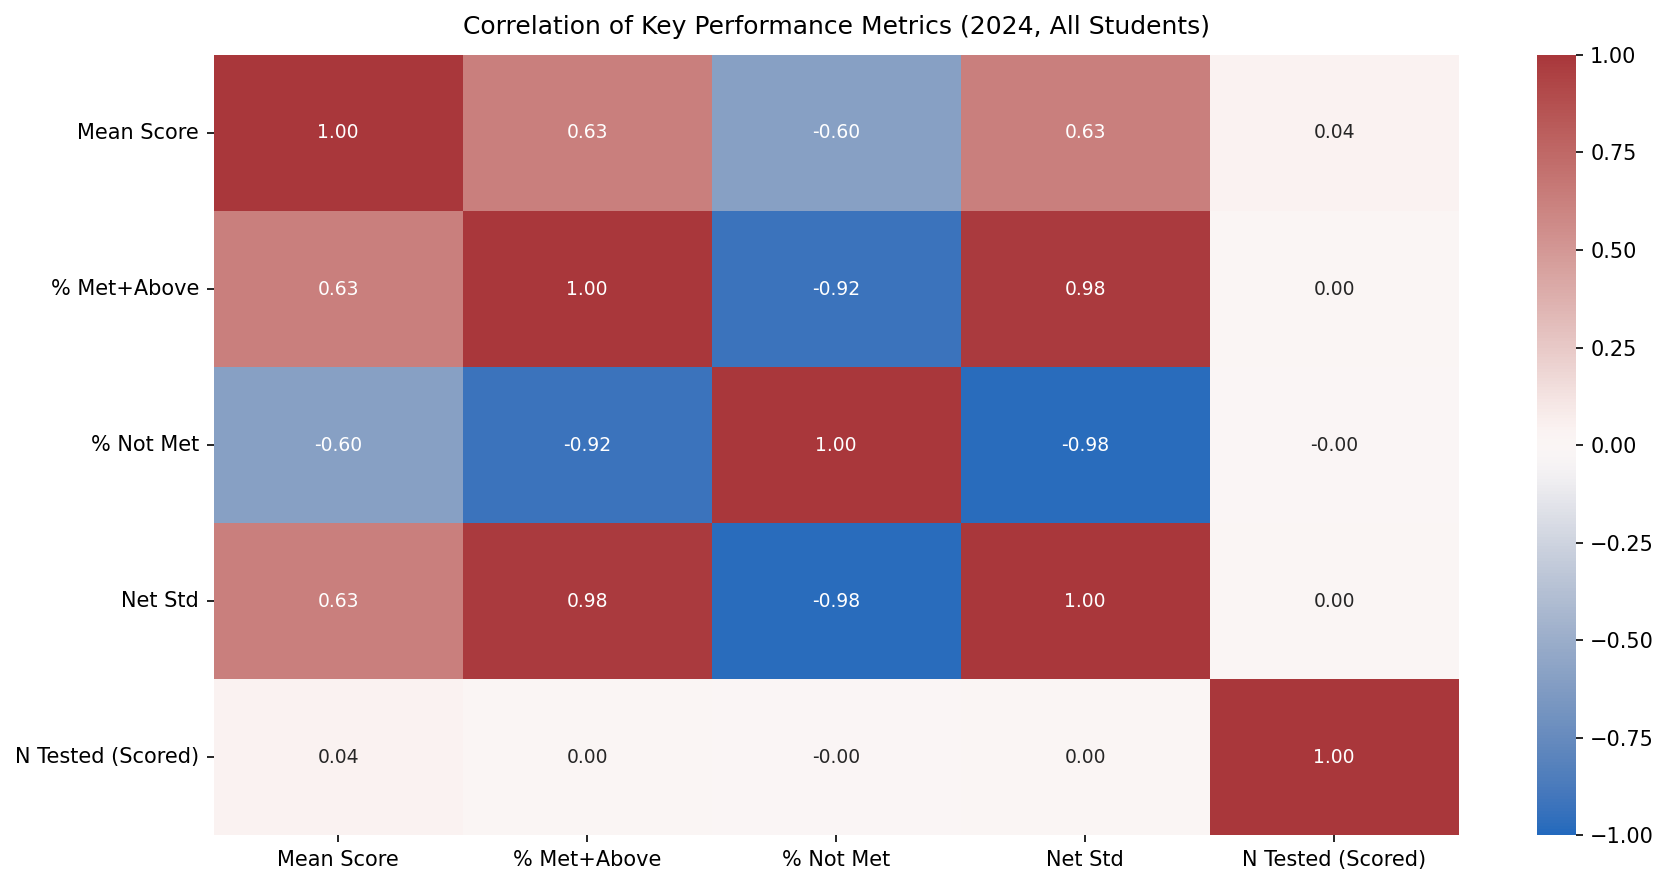

In [67]:
# Pick key performance columns
perf_cols = [
    "Mean Scale Score",
    "Percentage Standard Met and Above",
    "Percentage Standard Not Met",
    "Percentage Standard Met",
    "Percentage Standard Exceeded",
    "Percentage Standard Nearly Met",
    "Total Students Tested with Scores",
]

# Filter to 2024 and (optionally) All Students if present
mask = df["Test Year"].astype(str).eq("2024")
if "Student Group ID" in df.columns:
    mask &= df["Student Group ID"].astype(str).isin(["1"])  # 1 = All Students

df_plot = df.loc[mask, perf_cols + (["Grade"] if "Grade" in df.columns else [])].copy()

# Coerce to numeric
for c in perf_cols:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# Derive “Net Standard” = Met & Above minus Not Met (higher is better)
df_plot["Net Standard"] = df_plot["Percentage Standard Met and Above"] - df_plot["Percentage Standard Not Met"]

# Keep rows with at least mean score or a key percentage present
df_plot = df_plot.dropna(subset=["Mean Scale Score", "Percentage Standard Met and Above"], how="all")

# Correlation heatmap (bigger figure + short labels)
corr_cols = [
    "Mean Scale Score",
    "Percentage Standard Met and Above",
    "Percentage Standard Not Met",
    "Net Standard",
    "Total Students Tested with Scores",
]

label_map = {
    "Mean Scale Score": "Mean Score",
    "Percentage Standard Met and Above": "% Met+Above",
    "Percentage Standard Not Met": "% Not Met",
    "Net Standard": "Net Std",
    "Total Students Tested with Scores": "N Tested (Scored)",
}

corr = df_plot[corr_cols].rename(columns=label_map).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
sns.heatmap(
    corr, annot=True, cmap="vlag", vmin=-1, vmax=1, fmt=".2f",
    square=False, annot_kws={"fontsize":9}, ax=ax
)
ax.set_title("Correlation of Key Performance Metrics (2024, All Students)", pad=10)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [68]:
# Baseline filter: 2024, All Students, LAUSD districtwide row
mask_base = (
    df["Test Year"].astype(str).eq("2024")
    & df["Student Group ID"].astype(str).eq("1")
    & df["District Code"].astype(str).eq("64733")
    & df["School Code"].astype(str).eq("0000000")
)

df_la = df.loc[mask_base].copy()
if df_la.empty:
    print("No LAUSD districtwide rows found for 2024 All Students.")
else:
    # Ensure Grade is sortable
    if "Grade" in df_la.columns:
        df_la["Grade_num"] = pd.to_numeric(df_la["Grade"], errors="coerce")

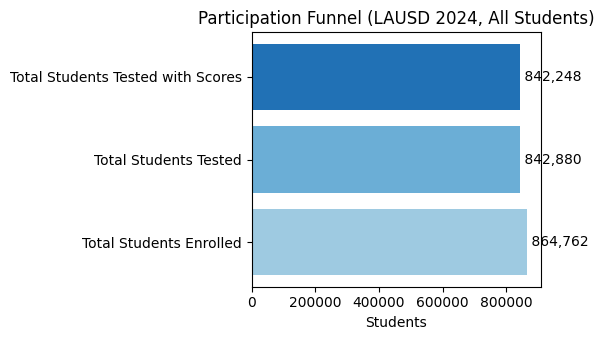

In [69]:
# Participation (overall LAUSD, sums across grades)
if df_la.empty:
    print("df_la is empty; run the baseline filter cell first.")
else:
    stage_cols = [
        "Total Students Enrolled",
        "Total Students Tested",
        "Total Students Tested with Scores",
    ]
    totals = df_la[stage_cols].apply(pd.to_numeric, errors="coerce").sum().astype(int)

    stages = totals.index.tolist()
    values = totals.values

    plt.figure(figsize=(6, 3.5))
    y = np.arange(len(stages))
    plt.barh(y, values, color=["#9ecae1", "#6baed6", "#2171b5"])
    for i, v in enumerate(values):
        plt.text(v, i, f" {v:,}", va="center")
    plt.yticks(y, stages)
    plt.xlabel("Students")
    plt.title("Participation Funnel (LAUSD 2024, All Students)")
    plt.tight_layout()
    plt.show()

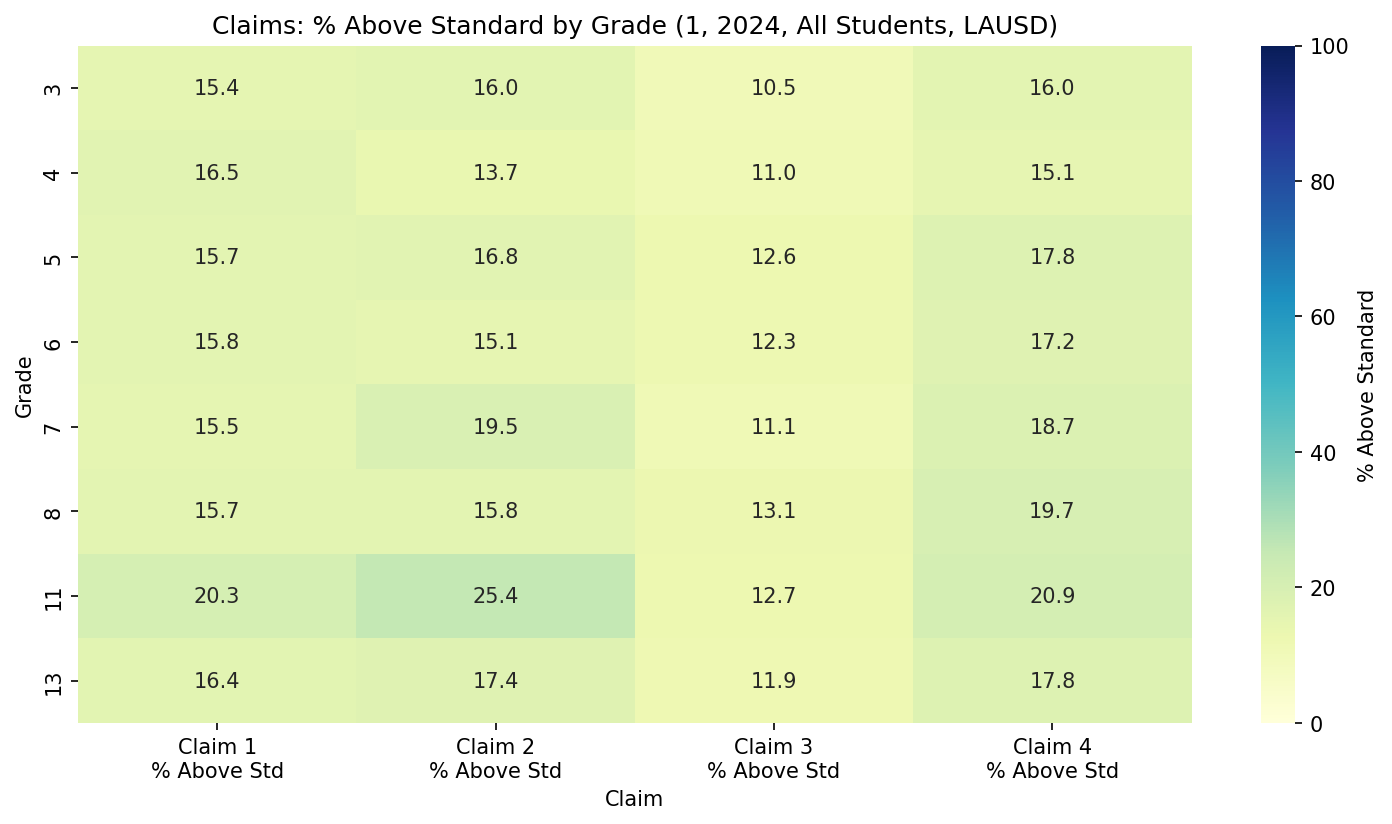

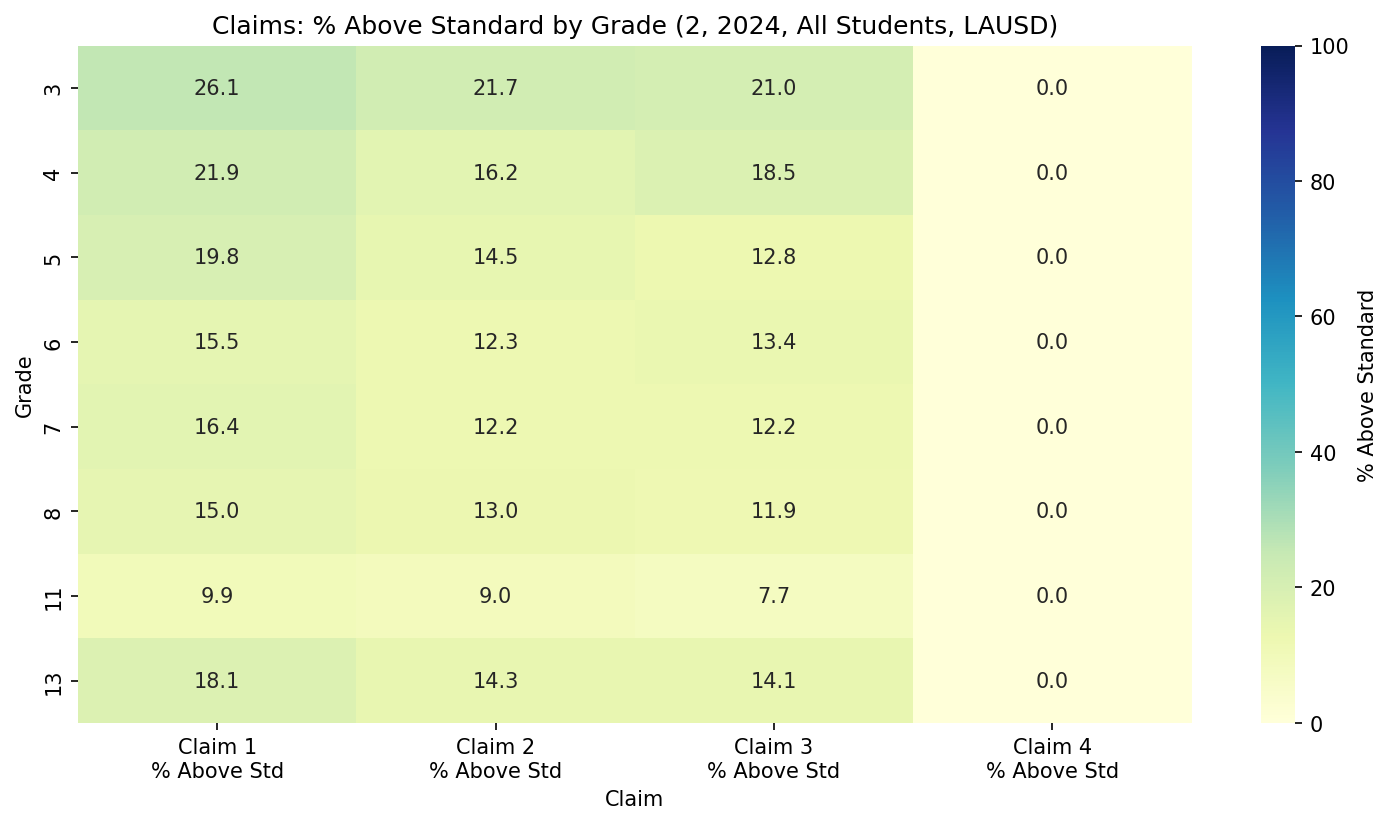

In [70]:
# Claims heatmap: larger figure + short labels
if df_la.empty:
    print("df_la is empty; run the baseline filter cell first.")
else:
    claim_cols = [
        "Area 1 Percentage Above Standard",
        "Area 2 Percentage Above Standard",
        "Area 3 Percentage Above Standard",
        "Area 4 Percentage Above Standard",
    ]
    
    # Shortened labels for readability
    label_map = {
        "Area 1 Percentage Above Standard": "Claim 1\n% Above Std",
        "Area 2 Percentage Above Standard": "Claim 2\n% Above Std",
        "Area 3 Percentage Above Standard": "Claim 3\n% Above Std",
        "Area 4 Percentage Above Standard": "Claim 4\n% Above Std",
    }

    # Loop for each Test ID (subject)
    for c in claim_cols:
        df_la[c] = pd.to_numeric(df_la[c], errors="coerce")

    for test_id, g in df_la.groupby("Test ID"):
        g = g.sort_values("Grade_num")
        mat = g.set_index("Grade")[claim_cols].astype(float)
        if mat.empty:
            continue

        # Scale height with number of grades; widen for long labels
        height = max(4, 0.45 * len(mat.index) + 2)
        fig, ax = plt.subplots(figsize=(10, height), dpi=150)

        sns.heatmap(
            mat.rename(columns=label_map),
            annot=True, fmt=".1f",
            cmap="YlGnBu", vmin=0, vmax=100,
            cbar_kws={"label": "% Above Standard"},
            ax=ax
        )
        ax.set_title(f"Claims: % Above Standard by Grade ({test_id}, 2024, All Students, LAUSD)")
        ax.set_xlabel("Claim")
        ax.set_ylabel("Grade")
        plt.tight_layout()
        plt.show()

The meaning of Claim (Test ID):
ELA

Claim 1 = Reading

Claim 2 = Writing

Claim 3 = Listening

Claim 4 = Research/Inquiry

Math

Claim 1 = Concepts & Procedures

Claim 2 = Problem Solving

Claim 3 = Communicating Reasoning

Claim 4 = Data Analysis & Modeling

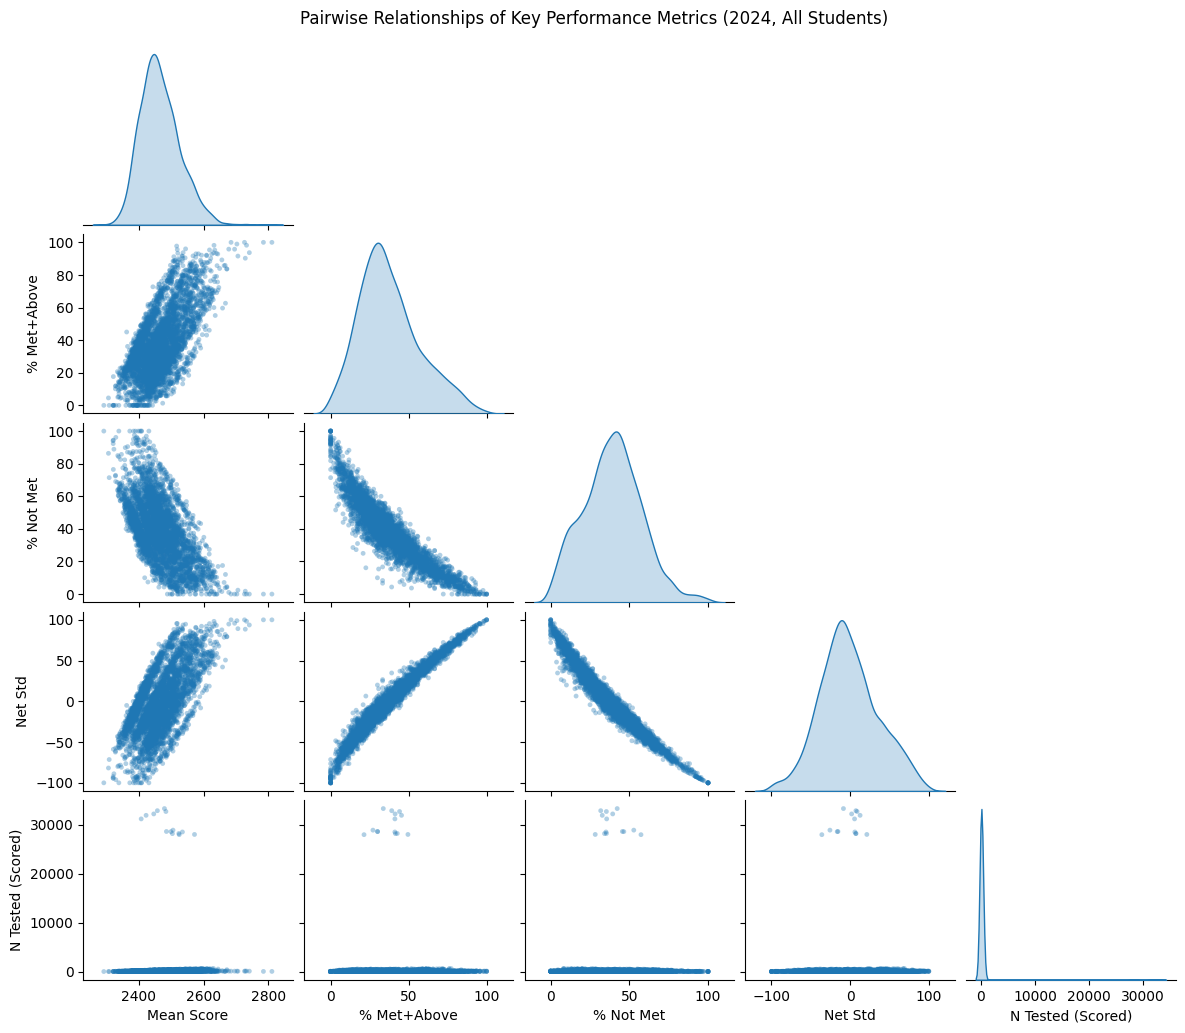

In [71]:
# Pairplot across key metrics (2024, All Students)
corr_cols = [
    "Mean Scale Score",
    "Percentage Standard Met and Above",
    "Percentage Standard Not Met",
    "Net Standard",
    "Total Students Tested with Scores",
]
label_map = {
    "Mean Scale Score": "Mean Score",
    "Percentage Standard Met and Above": "% Met+Above",
    "Percentage Standard Not Met": "% Not Met",
    "Net Standard": "Net Std",
    "Total Students Tested with Scores": "N Tested (Scored)",
}

df_pp = df_plot[corr_cols].dropna()
# Downsample to keep the grid readable
if len(df_pp) > 5000:
    df_pp = df_pp.sample(5000, random_state=0)

g = sns.pairplot(
    df_pp.rename(columns=label_map),
    corner=True,
    diag_kind="kde",
    plot_kws={"alpha": 0.35, "s": 12, "edgecolor": "none"}
)
g.fig.set_size_inches(12, 10)
g.fig.suptitle("Pairwise Relationships of Key Performance Metrics (2024, All Students)", y=1.02)
plt.show()

# Student Group Disaggregation Analysis

Student Group IDs (from CAASPP documentation):
- 1 = All Students
- 74 = American Indian or Alaska Native
- 75 = Asian
- 76 = Black or African American
- 77 = Filipino
- 78 = Hispanic or Latino
- 79 = Native Hawaiian or Pacific Islander
- 80 = White
- 90 = Two or More Races
- 128 = Economically Disadvantaged
- 160 = English Learners
- 31 = Students with Disabilities

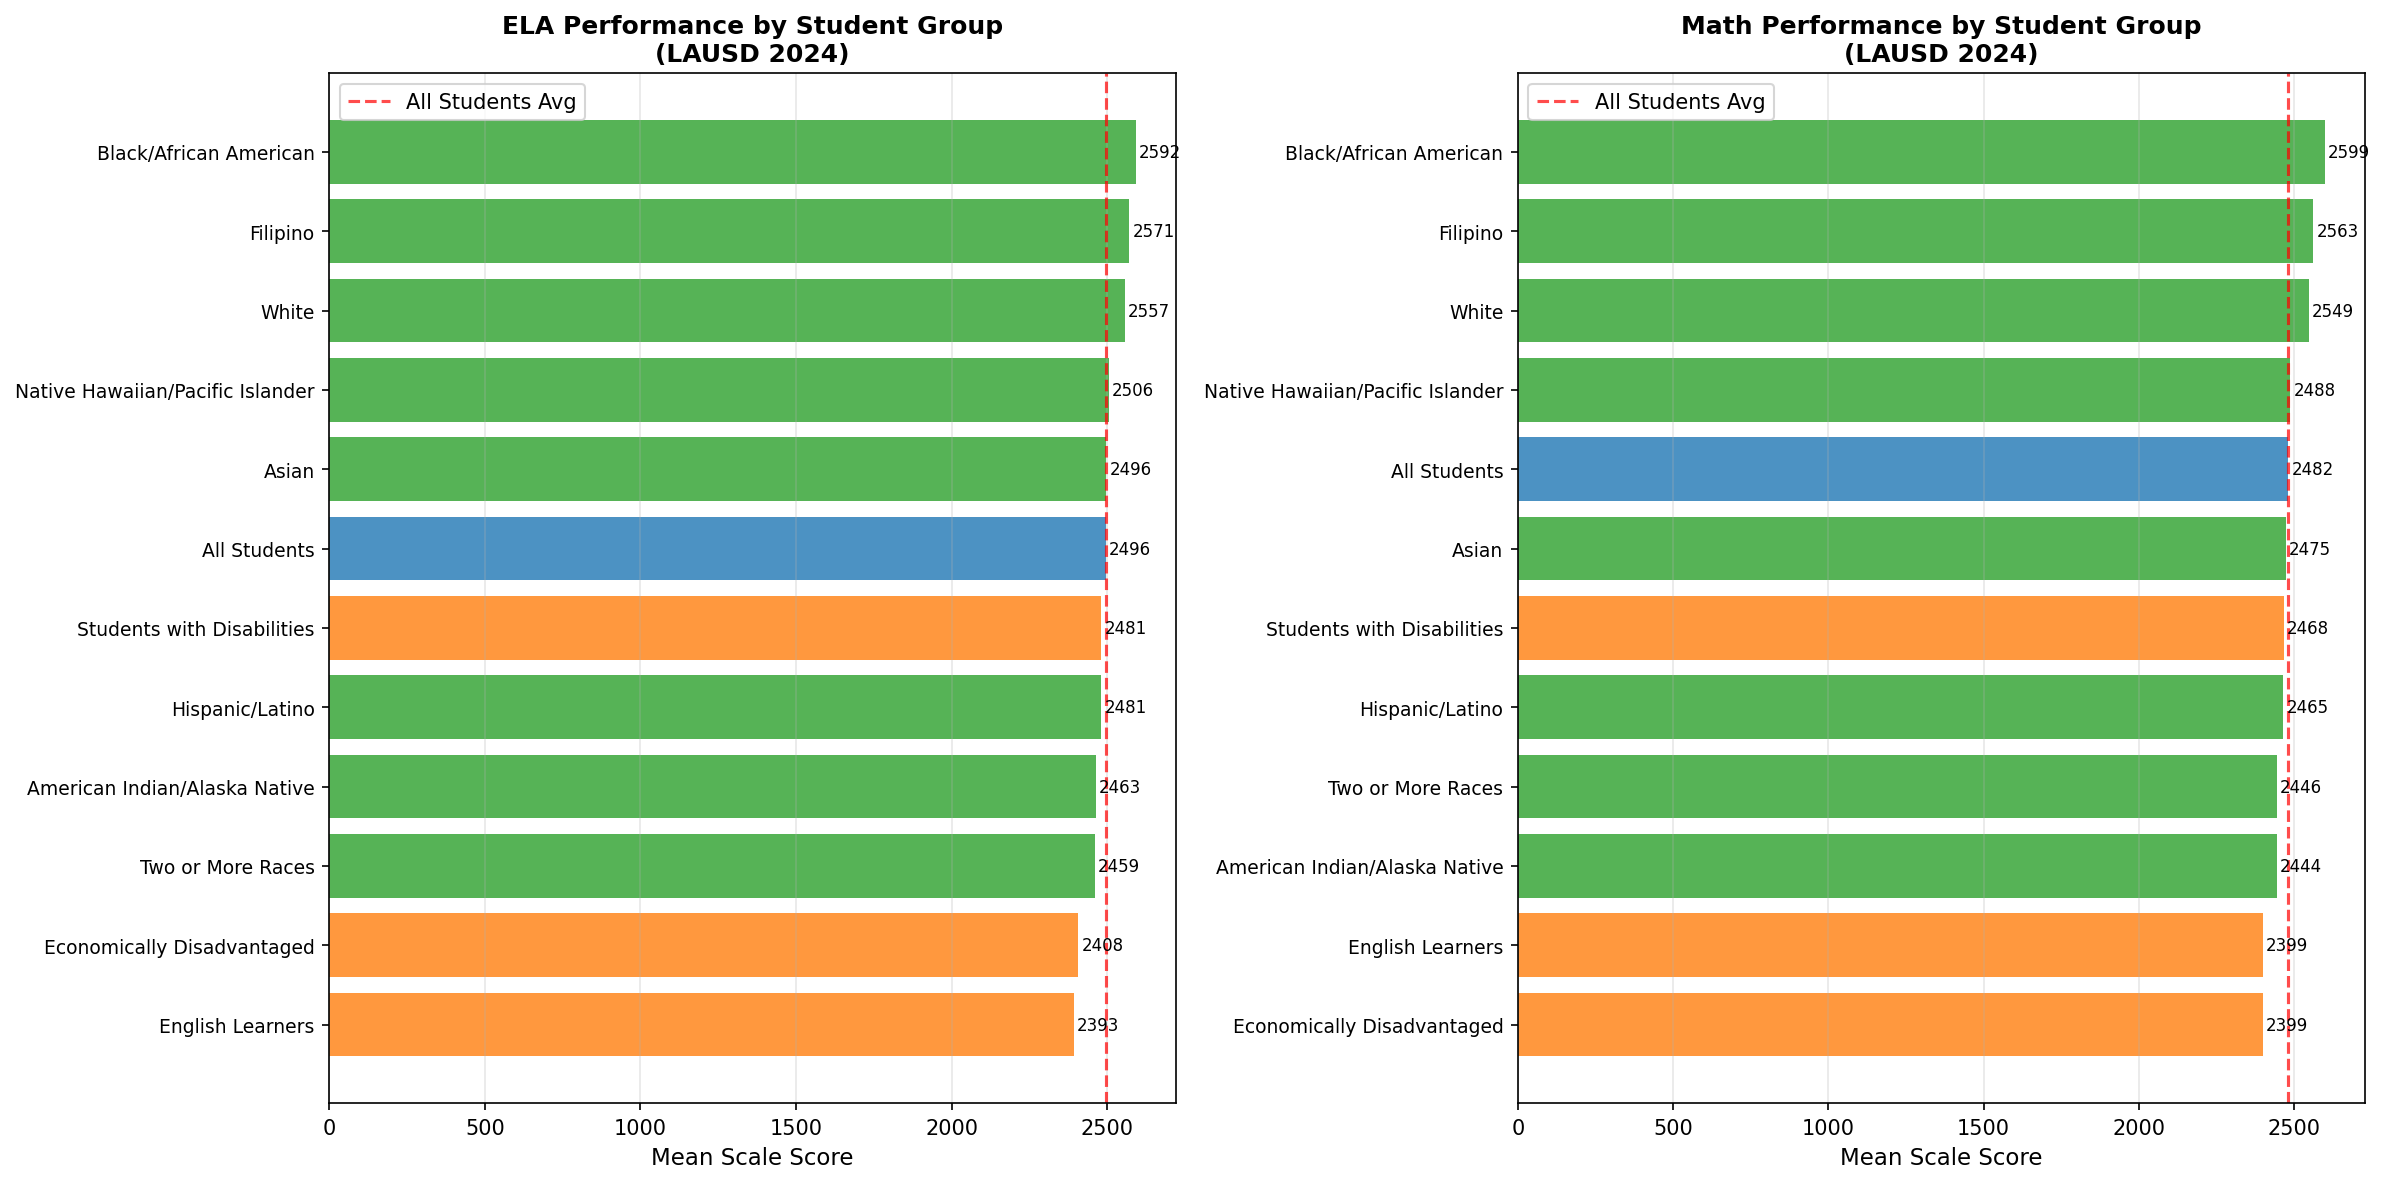


Top 3 Highest Performing Groups (by Mean Scale Score):
             Student Group Test ID  Mean Scale Score
7   Black/African American       2       2599.114286
6   Black/African American       1       2591.957143
12                Filipino       1       2571.242857

Bottom 3 Lowest Performing Groups:
                 Student Group Test ID  Mean Scale Score
10            English Learners       1            2393.1
9   Economically Disadvantaged       2       2398.785714
11            English Learners       2       2398.828571


In [73]:
# 1. Student Group Performance Comparison - Mean Scale Scores by Demographics
# Filter for 2024, LAUSD districtwide (School Code = 0000000)

# Define student groups with their labels
student_groups = {
    '1': 'All Students',
    '74': 'American Indian/Alaska Native',
    '75': 'Asian',
    '76': 'Black/African American',
    '77': 'Filipino',
    '78': 'Hispanic/Latino',
    '79': 'Native Hawaiian/Pacific Islander',
    '80': 'White',
    '90': 'Two or More Races',
    '128': 'Economically Disadvantaged',
    '160': 'English Learners',
    '31': 'Students with Disabilities'
}

# Filter data for 2024, LAUSD districtwide
mask_groups = (
    df["Test Year"].astype(str).eq("2024")
    & df["District Code"].astype(str).eq("64733")
    & df["School Code"].astype(str).eq("0000000")
    & df["Student Group ID"].astype(str).isin(student_groups.keys())
)

df_groups = df.loc[mask_groups].copy()

# Convert metrics to numeric
df_groups["Mean Scale Score"] = pd.to_numeric(df_groups["Mean Scale Score"], errors="coerce")
df_groups["Percentage Standard Met and Above"] = pd.to_numeric(df_groups["Percentage Standard Met and Above"], errors="coerce")

# Map student group IDs to labels
df_groups["Student Group"] = df_groups["Student Group ID"].astype(str).map(student_groups)

# Aggregate by student group and test (ELA vs Math)
df_group_summary = (
    df_groups.groupby(["Student Group", "Test ID"], dropna=False)
    .agg({
        "Mean Scale Score": "mean",
        "Percentage Standard Met and Above": "mean",
        "Total Students Tested with Scores": "sum"
    })
    .reset_index()
)

# Create side-by-side comparison for ELA vs Math
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=150)

for idx, test_id in enumerate(['1', '2']):  # 1=ELA, 2=Math
    ax = axes[idx]
    data = df_group_summary[df_group_summary["Test ID"].astype(str) == test_id].sort_values("Mean Scale Score", ascending=True)
    
    if data.empty:
        continue
    
    # Color by group type
    colors = ['#1f77b4' if g == 'All Students' 
              else '#ff7f0e' if 'Economically' in g or 'English' in g or 'Disabilities' in g
              else '#2ca02c' for g in data["Student Group"]]
    
    y_pos = np.arange(len(data))
    ax.barh(y_pos, data["Mean Scale Score"], color=colors, alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data["Student Group"], fontsize=9)
    ax.set_xlabel("Mean Scale Score", fontsize=11)
    ax.set_title(f"{'ELA' if test_id == '1' else 'Math'} Performance by Student Group\n(LAUSD 2024)", fontsize=12, fontweight='bold')
    ax.axvline(data[data["Student Group"] == "All Students"]["Mean Scale Score"].values[0] if len(data[data["Student Group"] == "All Students"]) > 0 else 2500, 
               color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='All Students Avg')
    ax.legend()
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(data["Mean Scale Score"]):
        ax.text(v + 10, i, f'{v:.0f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\nTop 3 Highest Performing Groups (by Mean Scale Score):")
print(df_group_summary.nlargest(3, "Mean Scale Score")[["Student Group", "Test ID", "Mean Scale Score"]])
print("\nBottom 3 Lowest Performing Groups:")
print(df_group_summary.nsmallest(3, "Mean Scale Score")[["Student Group", "Test ID", "Mean Scale Score"]])

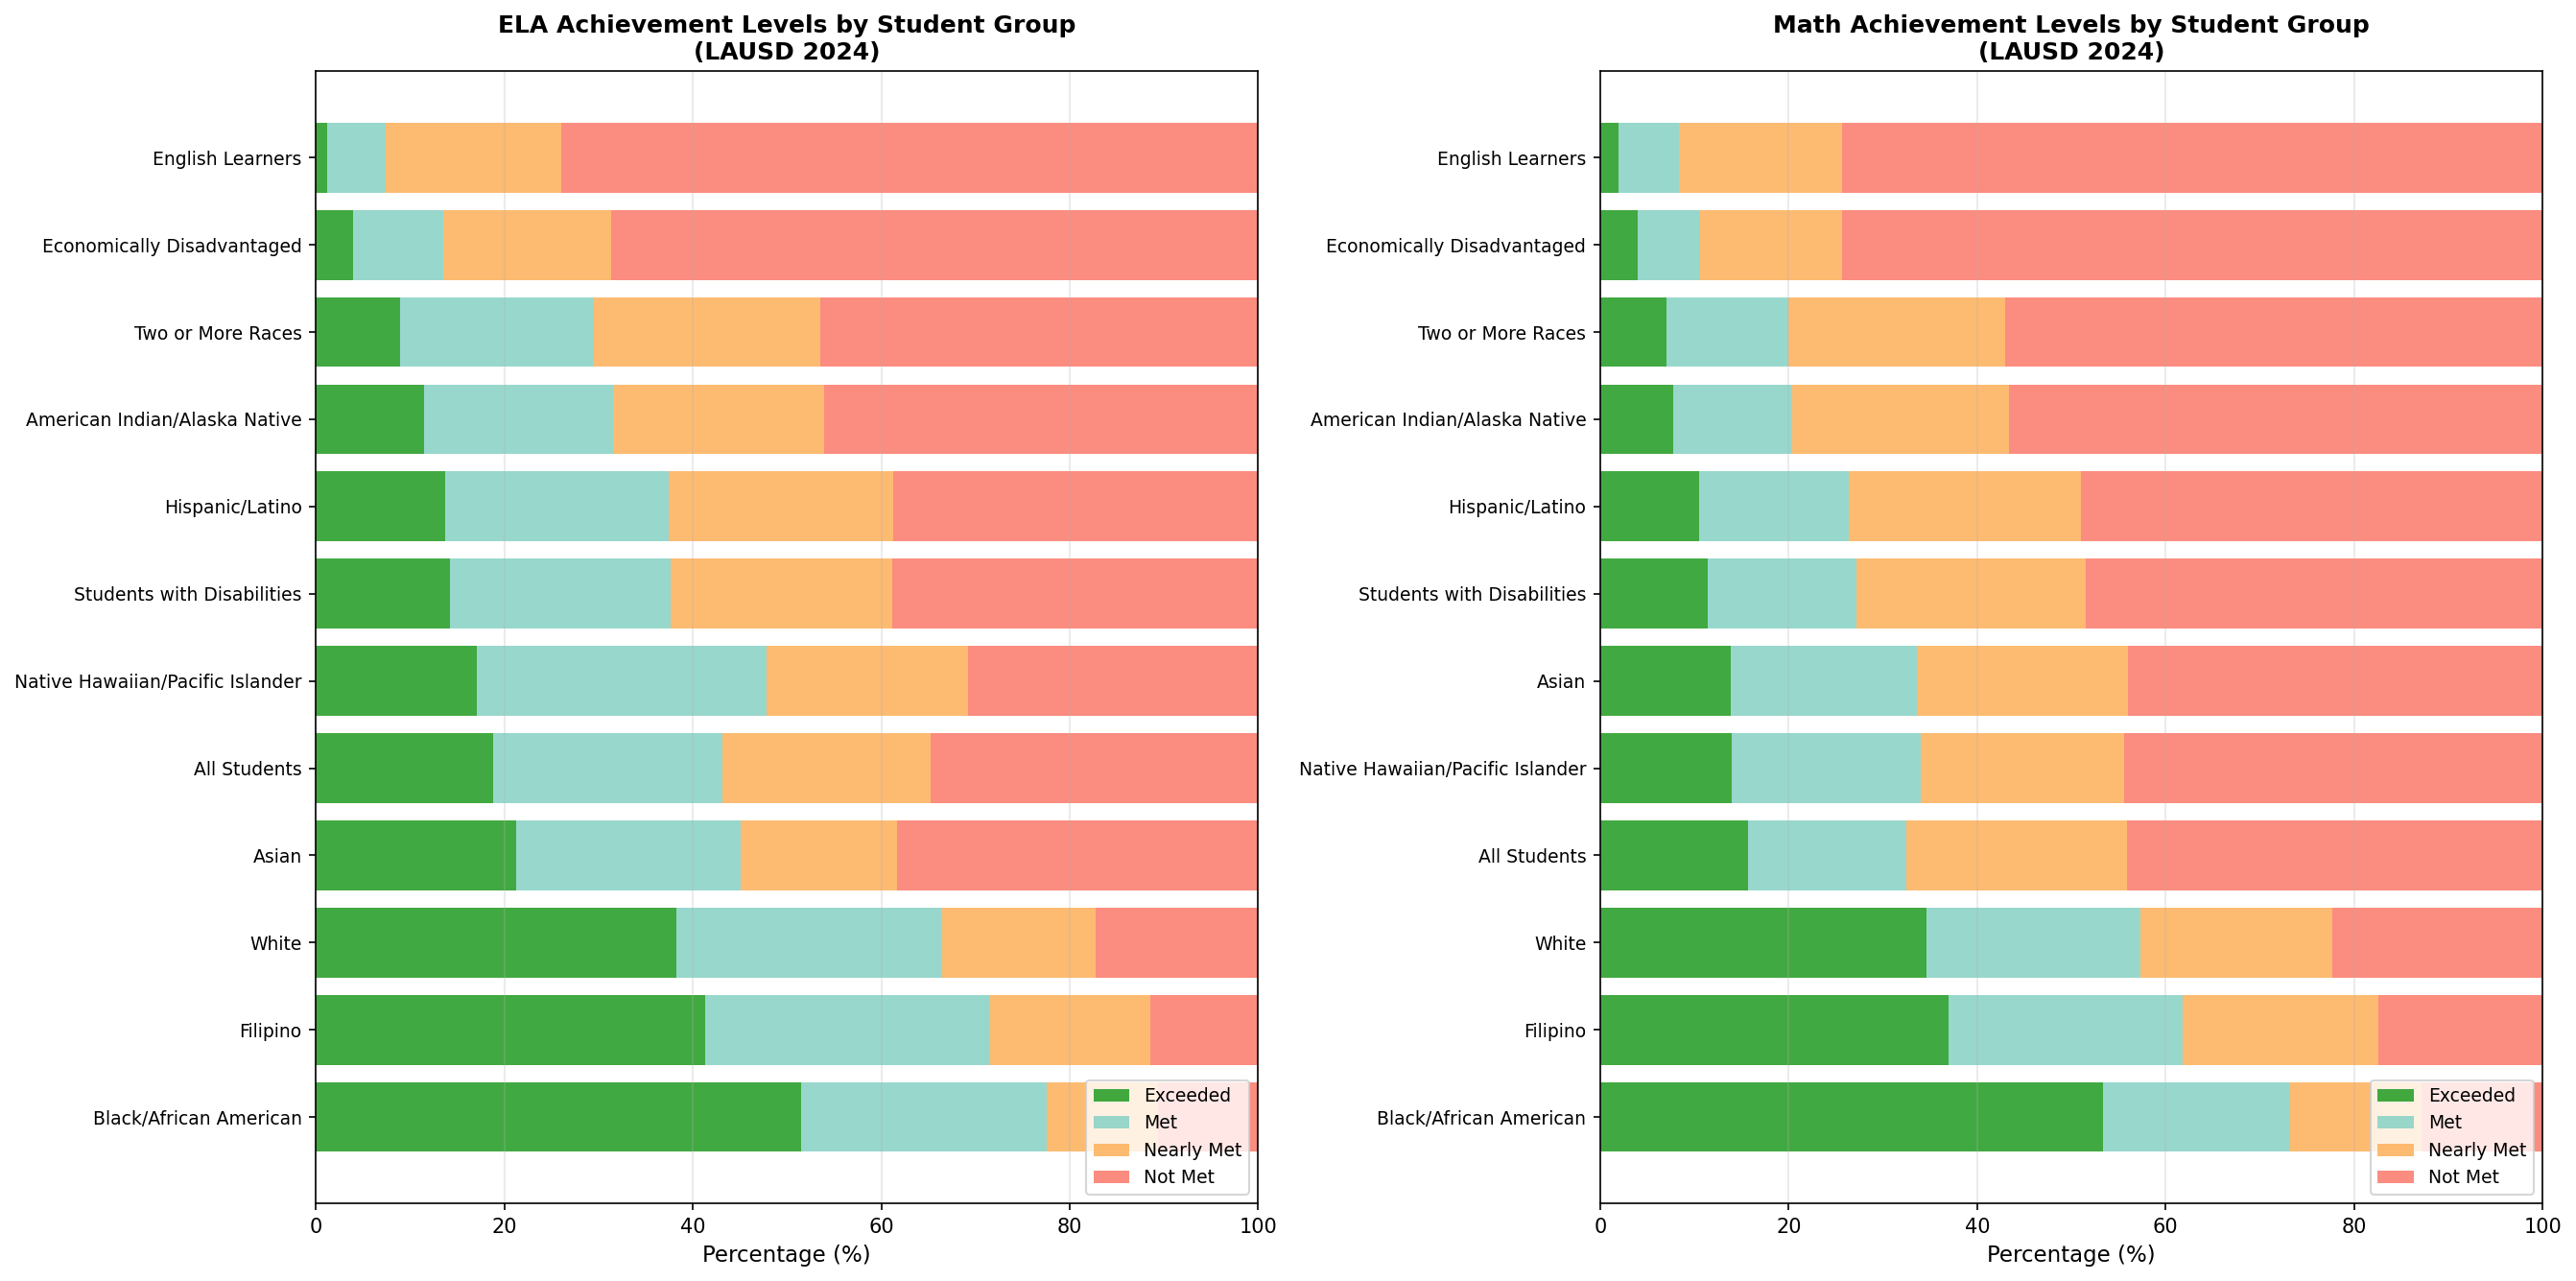


Achievement Gaps (Percentage Point Difference from 'All Students' in % Exceeded)
ELA Gaps:
                       Student Group  Percentage Standard Exceeded  \
10                  English Learners                       1.18625   
8         Economically Disadvantaged                         3.935   
20                 Two or More Races                         8.985   
2      American Indian/Alaska Native                       11.5075   
14                   Hispanic/Latino                      13.68625   
18        Students with Disabilities                        14.225   
16  Native Hawaiian/Pacific Islander                        17.125   
0                       All Students                       18.8275   
4                              Asian                         21.27   
22                             White                      38.26625   
12                          Filipino                        41.285   
6             Black/African American                      51.46125  

In [ ]:
# Achievement Gap Analysis - Percentage Met/Exceeded by Student Group
# Show the distribution across performance levels

# Prepare data with all performance bands
df_gaps = df_groups.copy()
df_gaps["Percentage Standard Exceeded"] = pd.to_numeric(df_gaps["Percentage Standard Exceeded"], errors="coerce")
df_gaps["Percentage Standard Met"] = pd.to_numeric(df_gaps["Percentage Standard Met"], errors="coerce")
df_gaps["Percentage Standard Nearly Met"] = pd.to_numeric(df_gaps["Percentage Standard Nearly Met"], errors="coerce")
df_gaps["Percentage Standard Not Met"] = pd.to_numeric(df_gaps["Percentage Standard Not Met"], errors="coerce")

# Aggregate by student group and test
df_gap_summary = (
    df_gaps.groupby(["Student Group", "Test ID"], dropna=False)
    .agg({
        "Percentage Standard Exceeded": "mean",
        "Percentage Standard Met": "mean",
        "Percentage Standard Nearly Met": "mean",
        "Percentage Standard Not Met": "mean"
    })
    .reset_index()
)

# Create grouped bar chart showing all performance levels
fig, axes = plt.subplots(1, 2, figsize=(18, 9), dpi=150)

for idx, test_id in enumerate(['1', '2']):
    ax = axes[idx]
    data = df_gap_summary[df_gap_summary["Test ID"].astype(str) == test_id].sort_values("Percentage Standard Exceeded", ascending=False)
    
    if data.empty:
        continue
    
    x = np.arange(len(data))
    width = 0.2
    
    # Create stacked bar chart
    p1 = ax.barh(x, data["Percentage Standard Exceeded"], width*4, label='Exceeded', color='#2ca02c', alpha=0.9)
    p2 = ax.barh(x, data["Percentage Standard Met"], width*4, left=data["Percentage Standard Exceeded"], label='Met', color='#8dd3c7', alpha=0.9)
    p3 = ax.barh(x, data["Percentage Standard Nearly Met"], width*4, 
                 left=data["Percentage Standard Exceeded"] + data["Percentage Standard Met"], 
                 label='Nearly Met', color='#fdb462', alpha=0.9)
    p4 = ax.barh(x, data["Percentage Standard Not Met"], width*4,
                 left=data["Percentage Standard Exceeded"] + data["Percentage Standard Met"] + data["Percentage Standard Nearly Met"],
                 label='Not Met', color='#fb8072', alpha=0.9)
    
    ax.set_yticks(x)
    ax.set_yticklabels(data["Student Group"], fontsize=9)
    ax.set_xlabel("Percentage (%)", fontsize=11)
    ax.set_title(f"{'ELA' if test_id == '1' else 'Math'} Achievement Levels by Student Group\n(LAUSD 2024)", 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.set_xlim(0, 100)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display achievement gaps relative to "All Students"
all_students_ela = df_gap_summary[(df_gap_summary["Student Group"] == "All Students") & 
                                   (df_gap_summary["Test ID"].astype(str) == "1")]["Percentage Standard Exceeded"].values
all_students_math = df_gap_summary[(df_gap_summary["Student Group"] == "All Students") & 
                                    (df_gap_summary["Test ID"].astype(str) == "2")]["Percentage Standard Exceeded"].values

if len(all_students_ela) > 0 and len(all_students_math) > 0:
    df_gap_summary["Gap from All Students (ELA)"] = df_gap_summary.apply(
        lambda row: row["Percentage Standard Exceeded"] - all_students_ela[0] if row["Test ID"] == '1' else None, axis=1
    )
    df_gap_summary["Gap from All Students (Math)"] = df_gap_summary.apply(
        lambda row: row["Percentage Standard Exceeded"] - all_students_math[0] if row["Test ID"] == '2' else None, axis=1
    )
    
    print("\nAchievement Gaps (Percentage Point Difference from 'All Students' in % Exceeded)")
    print("ELA Gaps:")
    print(df_gap_summary[df_gap_summary["Test ID"] == '1'][["Student Group", "Percentage Standard Exceeded", "Gap from All Students (ELA)"]]
          .sort_values("Gap from All Students (ELA)"))
    print("\nMath Gaps:")
    print(df_gap_summary[df_gap_summary["Test ID"] == '2'][["Student Group", "Percentage Standard Exceeded", "Gap from All Students (Math)"]]
          .sort_values("Gap from All Students (Math)"))

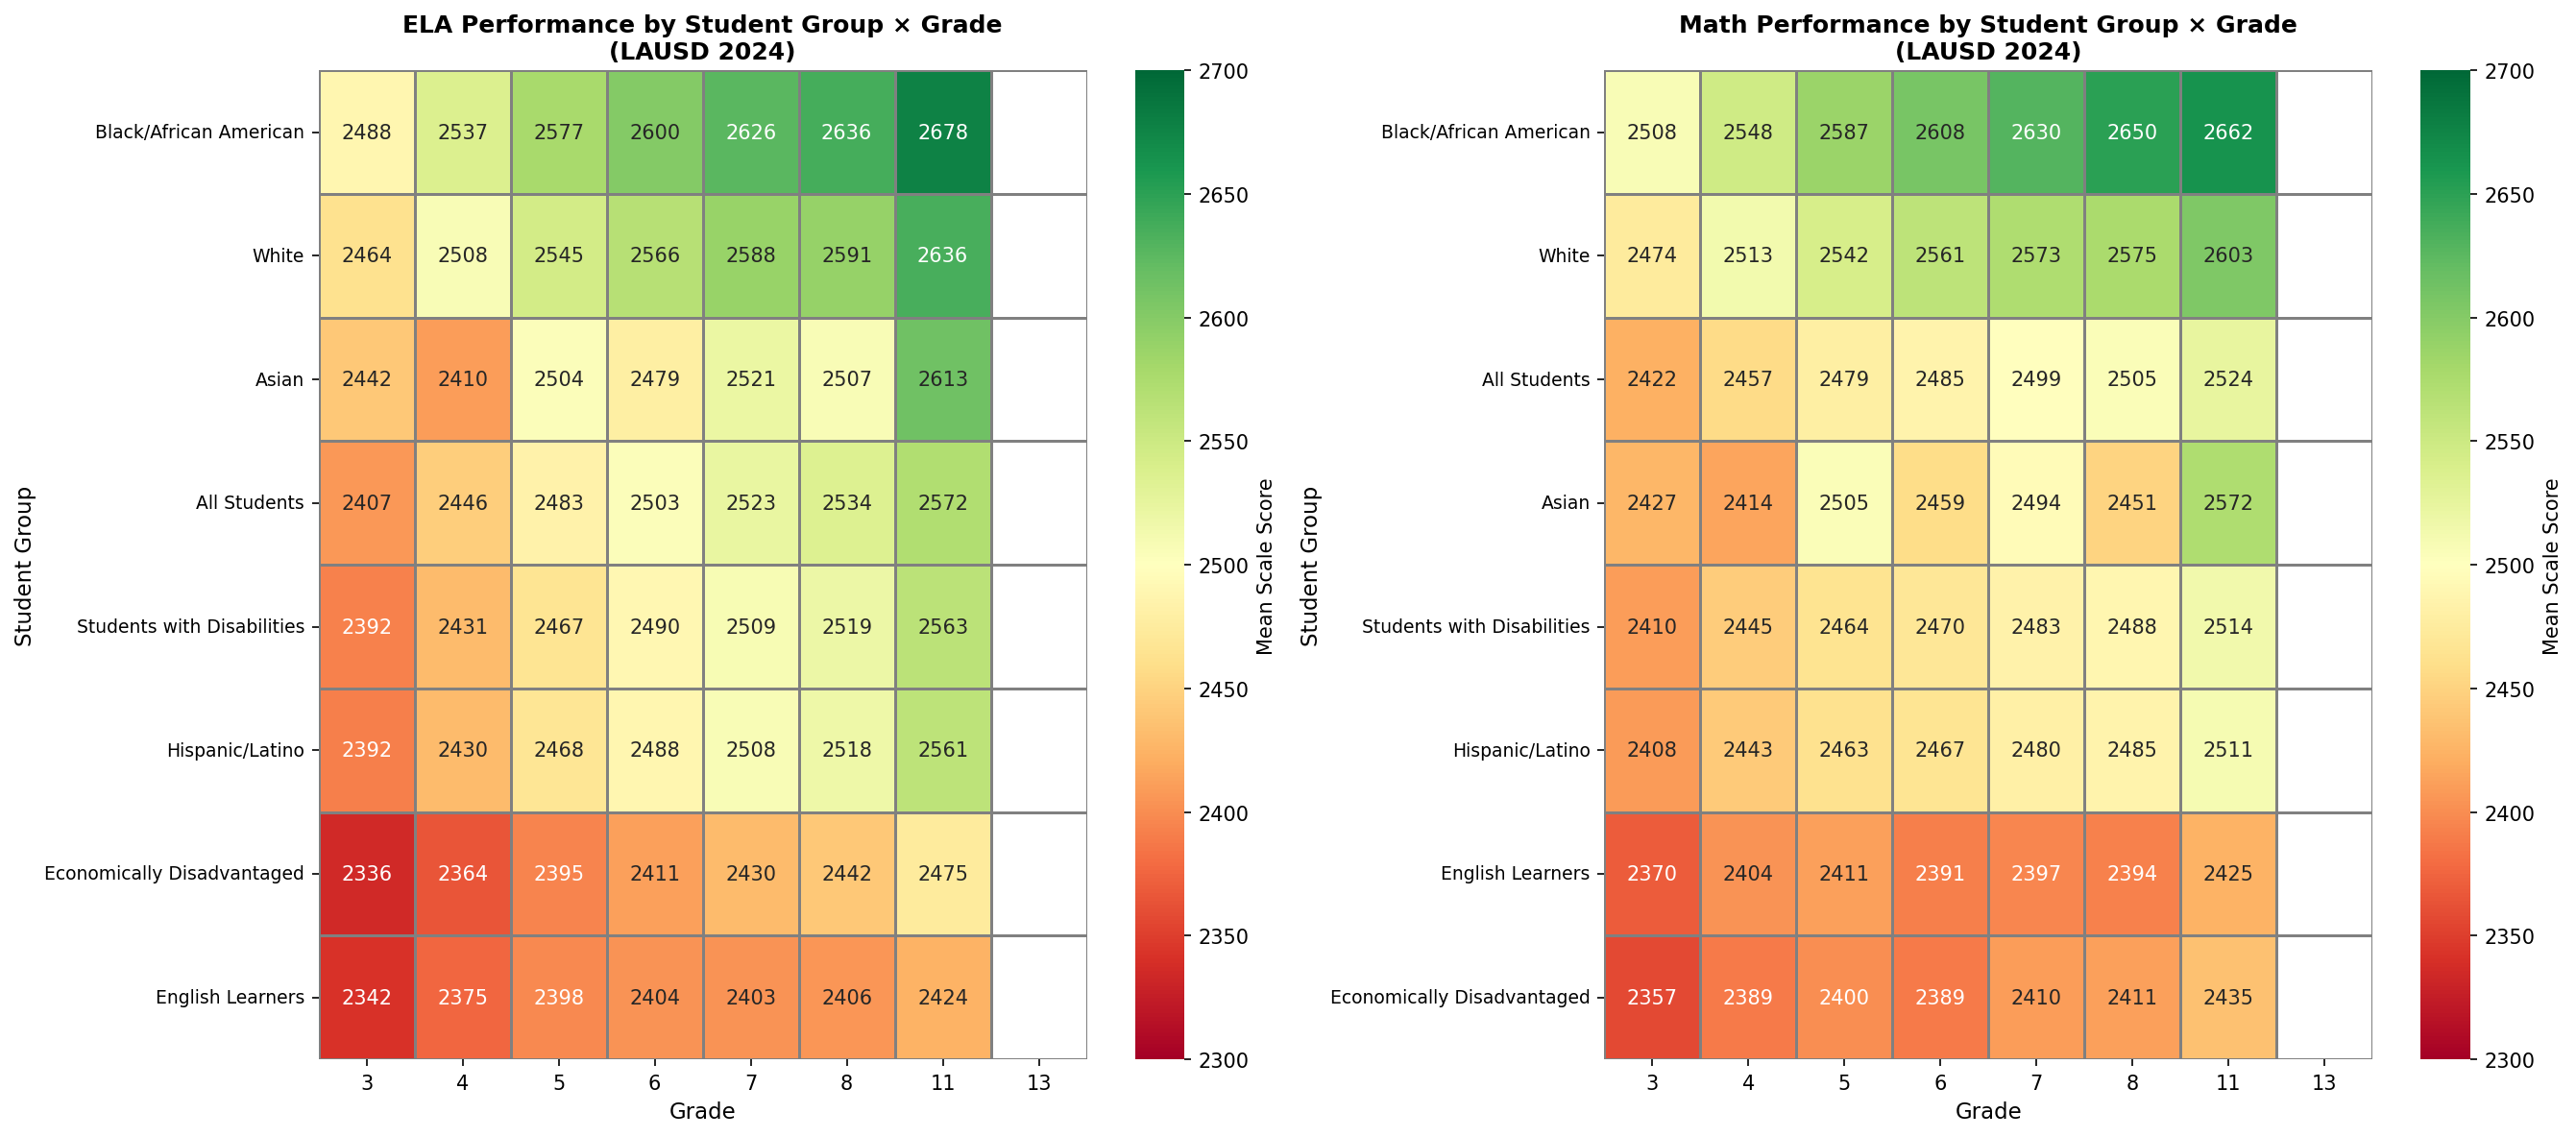


Grade-Level Trends by Student Group

ELA:
  All Students: -37 points (Grade 11 → 8)
  Asian: -106 points (Grade 11 → 8)
  Black/African American: -42 points (Grade 11 → 8)
  Hispanic/Latino: -43 points (Grade 11 → 8)
  White: -45 points (Grade 11 → 8)
  Economically Disadvantaged: -33 points (Grade 11 → 8)
  English Learners: -18 points (Grade 11 → 8)
  Students with Disabilities: -43 points (Grade 11 → 8)

Math:
  All Students: -19 points (Grade 11 → 8)
  Asian: -121 points (Grade 11 → 8)
  Black/African American: -12 points (Grade 11 → 8)
  Hispanic/Latino: -26 points (Grade 11 → 8)
  White: -28 points (Grade 11 → 8)
  Economically Disadvantaged: -24 points (Grade 11 → 8)
  English Learners: -31 points (Grade 11 → 8)
  Students with Disabilities: -26 points (Grade 11 → 8)


In [ ]:
# Student Group × Grade Heatmap - How performance varies across grades for each group

# Filter for key student groups and grades
key_groups = ['1', '75', '76', '78', '80', '128', '160', '31']  # All, Asian, Black, Hispanic, White, Econ Disadv, ELL, SWD

mask_grade_group = (
    df["Test Year"].astype(str).eq("2024")
    & df["District Code"].astype(str).eq("64733")
    & df["School Code"].astype(str).eq("0000000")
    & df["Student Group ID"].astype(str).isin(key_groups)
    & df["Grade"].notna()
)

df_grade_group = df.loc[mask_grade_group].copy()
df_grade_group["Mean Scale Score"] = pd.to_numeric(df_grade_group["Mean Scale Score"], errors="coerce")
df_grade_group["Student Group"] = df_grade_group["Student Group ID"].astype(str).map(student_groups)

# Aggregate by student group, grade, and test
df_grade_summary = (
    df_grade_group.groupby(["Student Group", "Grade", "Test ID"], dropna=False)
    ["Mean Scale Score"]
    .mean()
    .reset_index()
)

# Create heatmaps for ELA and Math
fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=150)

for idx, test_id in enumerate(['1', '2']):
    ax = axes[idx]
    data = df_grade_summary[df_grade_summary["Test ID"].astype(str) == test_id]
    
    if data.empty:
        continue
    
    # Pivot for heatmap
    pivot = data.pivot(index="Student Group", columns="Grade", values="Mean Scale Score")
    
    # Sort grades properly
    grade_order = sorted(pivot.columns, key=lambda x: float(x) if str(x).replace('.','').isdigit() else 99)
    pivot = pivot[grade_order]
    
    # Sort student groups by overall mean score
    pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]
    
    # Convert pd.NA to np.nan for seaborn compatibility
    # Replace pd.NA with np.nan using apply + where to handle NAType
    pivot = pivot.astype(float)
    
    sns.heatmap(
        pivot, 
        annot=True, 
        fmt=".0f", 
        cmap="RdYlGn",
        vmin=2300, 
        vmax=2700,
        cbar_kws={"label": "Mean Scale Score"},
        ax=ax,
        linewidths=0.5,
        linecolor='gray'
    )
    
    ax.set_title(f"{'ELA' if test_id == '1' else 'Math'} Performance by Student Group × Grade\n(LAUSD 2024)", 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel("Grade", fontsize=11)
    ax.set_ylabel("Student Group", fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

# Show which groups have the steepest decline/improvement across grades
print("\nGrade-Level Trends by Student Group")
for test_id, test_name in [('1', 'ELA'), ('2', 'Math')]:
    print(f"\n{test_name}:")
    data = df_grade_summary[df_grade_summary["Test ID"].astype(str) == test_id]
    for group in key_groups:
        group_data = data[data["Student Group"] == student_groups.get(group)]
        if len(group_data) >= 2:
            grades = group_data["Grade"].astype(float).values
            scores = group_data["Mean Scale Score"].values
            if len(scores) > 1:
                change = scores[-1] - scores[0]
                print(f"  {student_groups.get(group)}: {change:+.0f} points (Grade {grades[0]:.0f} → {grades[-1]:.0f})")

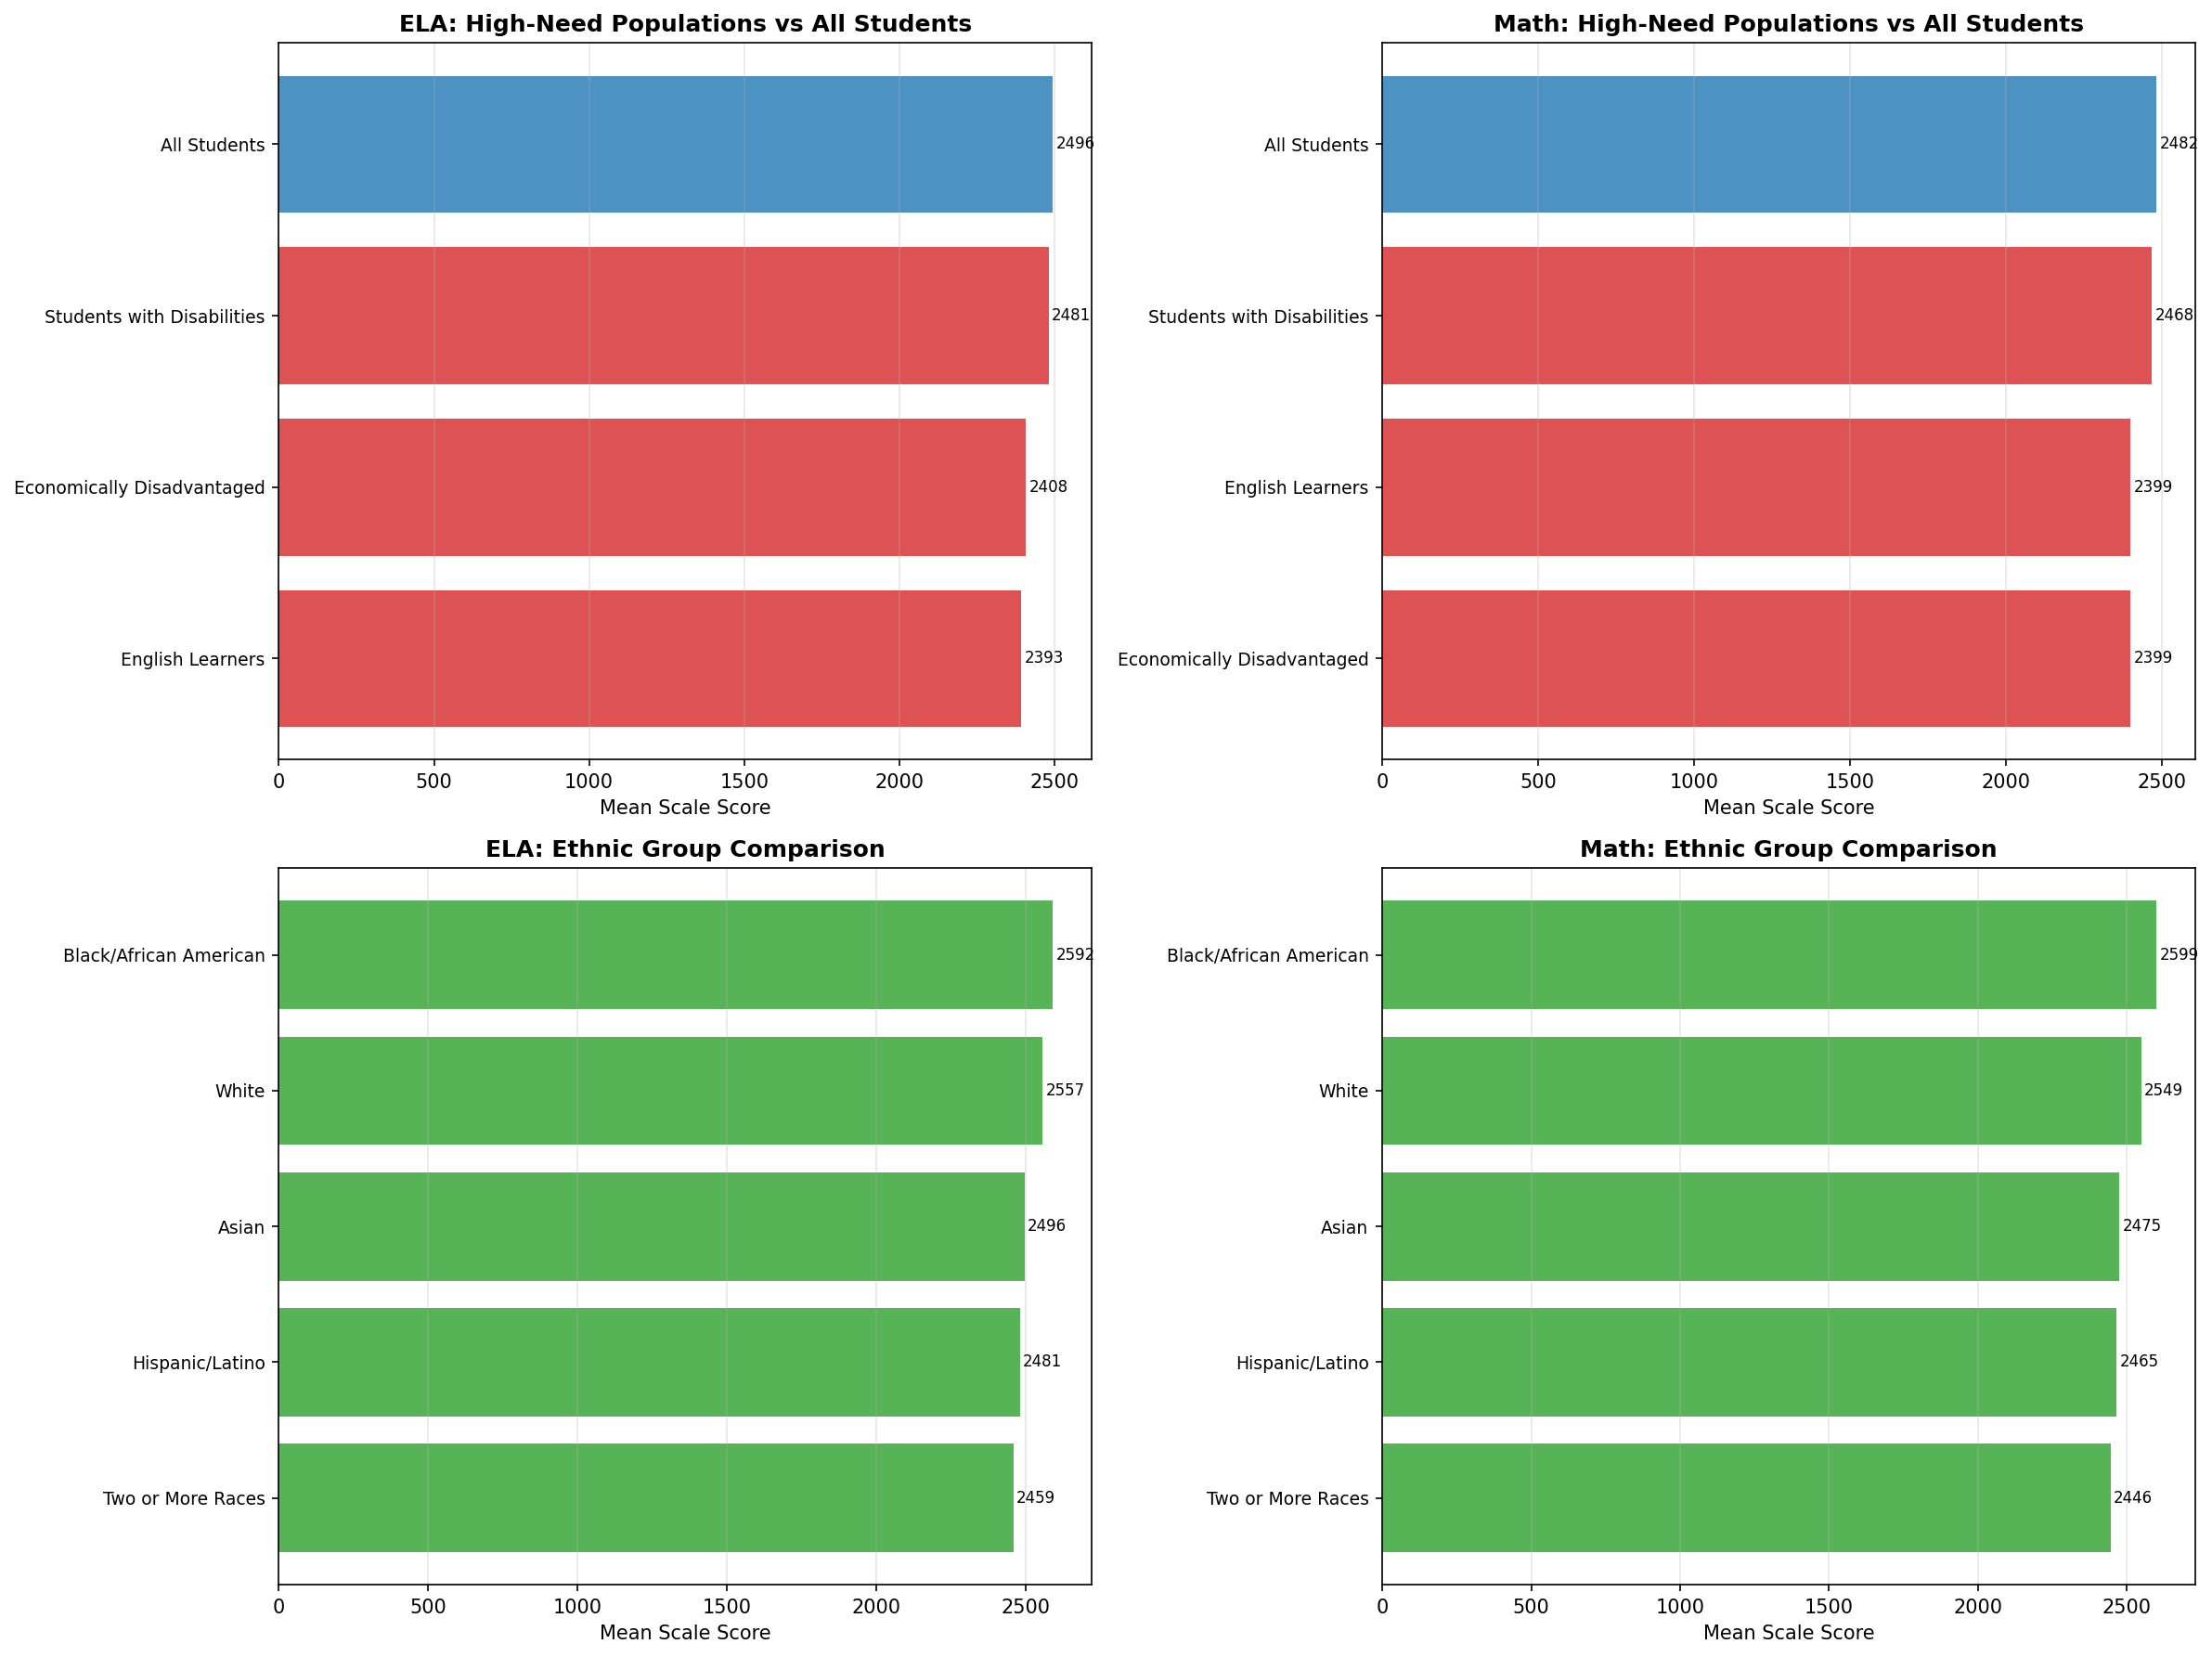


=== INTERSECTIONAL ANALYSIS SUMMARY ===

Largest Achievement Gaps in ELA:
  Black/African American (2592) vs English Learners (2393)
  Gap: 199 points

Largest Achievement Gaps in Math:
  Black/African American (2599) vs Economically Disadvantaged (2399)
  Gap: 200 points


In [ ]:
# 4. Intersectional Analysis - Performance by Combined Demographics
# Example: Economically Disadvantaged × Ethnicity, English Learners × Ethnicity

# This requires examining multiple student group combinations
# We'll create a visualization comparing high-need populations

# Define comparison groups
comparison_groups = {
    'General Population': ['1'],  # All Students
    'High-Need Populations': ['128', '160', '31'],  # Econ Disadv, ELL, SWD
    'Major Ethnic Groups': ['75', '76', '78', '80']  # Asian, Black, Hispanic, White
}

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
axes = axes.flatten()

# Plot 1: High-Need vs General (ELA)
ax = axes[0]
mask1 = df_group_summary["Test ID"].astype(str) == "1"
data = df_group_summary[mask1].copy()
data['Category'] = data['Student Group'].apply(
    lambda x: 'General' if x == 'All Students' 
    else 'High-Need' if any(g in student_groups.get(k, '') for k in ['128', '160', '31'] for g in [x])
    else 'Ethnic Group'
)
high_need_data = data[data['Category'].isin(['General', 'High-Need'])].sort_values('Mean Scale Score')

if not high_need_data.empty:
    colors = ['#1f77b4' if c == 'General' else '#d62728' for c in high_need_data['Category']]
    y_pos = np.arange(len(high_need_data))
    ax.barh(y_pos, high_need_data["Mean Scale Score"], color=colors, alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(high_need_data["Student Group"], fontsize=9)
    ax.set_xlabel("Mean Scale Score")
    ax.set_title("ELA: High-Need Populations vs All Students", fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(high_need_data["Mean Scale Score"]):
        ax.text(v + 10, i, f'{v:.0f}', va='center', fontsize=8)

# Plot 2: High-Need vs General (Math)
ax = axes[1]
mask2 = df_group_summary["Test ID"].astype(str) == "2"
data = df_group_summary[mask2].copy()
data['Category'] = data['Student Group'].apply(
    lambda x: 'General' if x == 'All Students' 
    else 'High-Need' if any(g in student_groups.get(k, '') for k in ['128', '160', '31'] for g in [x])
    else 'Ethnic Group'
)
high_need_data = data[data['Category'].isin(['General', 'High-Need'])].sort_values('Mean Scale Score')

if not high_need_data.empty:
    colors = ['#1f77b4' if c == 'General' else '#d62728' for c in high_need_data['Category']]
    y_pos = np.arange(len(high_need_data))
    ax.barh(y_pos, high_need_data["Mean Scale Score"], color=colors, alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(high_need_data["Student Group"], fontsize=9)
    ax.set_xlabel("Mean Scale Score")
    ax.set_title("Math: High-Need Populations vs All Students", fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(high_need_data["Mean Scale Score"]):
        ax.text(v + 10, i, f'{v:.0f}', va='center', fontsize=8)

# Plot 3: Ethnic Groups (ELA)
ax = axes[2]
ethnic_ela = df_group_summary[
    (df_group_summary["Test ID"].astype(str) == "1") & 
    (df_group_summary["Student Group"].isin([student_groups[k] for k in ['75', '76', '78', '80', '90']]))
].sort_values('Mean Scale Score')

if not ethnic_ela.empty:
    y_pos = np.arange(len(ethnic_ela))
    colors_ethnic = ['#2ca02c'] * len(ethnic_ela)
    ax.barh(y_pos, ethnic_ela["Mean Scale Score"], color=colors_ethnic, alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(ethnic_ela["Student Group"], fontsize=9)
    ax.set_xlabel("Mean Scale Score")
    ax.set_title("ELA: Ethnic Group Comparison", fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(ethnic_ela["Mean Scale Score"]):
        ax.text(v + 10, i, f'{v:.0f}', va='center', fontsize=8)

# Plot 4: Ethnic Groups (Math)
ax = axes[3]
ethnic_math = df_group_summary[
    (df_group_summary["Test ID"].astype(str) == "2") & 
    (df_group_summary["Student Group"].isin([student_groups[k] for k in ['75', '76', '78', '80', '90']]))
].sort_values('Mean Scale Score')

if not ethnic_math.empty:
    y_pos = np.arange(len(ethnic_math))
    colors_ethnic = ['#2ca02c'] * len(ethnic_math)
    ax.barh(y_pos, ethnic_math["Mean Scale Score"], color=colors_ethnic, alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(ethnic_math["Student Group"], fontsize=9)
    ax.set_xlabel("Mean Scale Score")
    ax.set_title("Math: Ethnic Group Comparison", fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(ethnic_math["Mean Scale Score"]):
        ax.text(v + 10, i, f'{v:.0f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nINTERSECTIONAL ANALYSIS SUMMARY\n")
print("Largest Achievement Gaps in ELA:")
ela_gaps = df_group_summary[df_group_summary["Test ID"] == "1"].nlargest(1, "Mean Scale Score")
ela_lowest = df_group_summary[df_group_summary["Test ID"] == "1"].nsmallest(1, "Mean Scale Score")
if not ela_gaps.empty and not ela_lowest.empty:
    gap_ela = ela_gaps["Mean Scale Score"].values[0] - ela_lowest["Mean Scale Score"].values[0]
    print(f"  {ela_gaps['Student Group'].values[0]} ({ela_gaps['Mean Scale Score'].values[0]:.0f}) vs "
          f"{ela_lowest['Student Group'].values[0]} ({ela_lowest['Mean Scale Score'].values[0]:.0f})")
    print(f"  Gap: {gap_ela:.0f} points\n")

print("Largest Achievement Gaps in Math:")
math_gaps = df_group_summary[df_group_summary["Test ID"] == "2"].nlargest(1, "Mean Scale Score")
math_lowest = df_group_summary[df_group_summary["Test ID"] == "2"].nsmallest(1, "Mean Scale Score")
if not math_gaps.empty and not math_lowest.empty:
    gap_math = math_gaps["Mean Scale Score"].values[0] - math_lowest["Mean Scale Score"].values[0]
    print(f"  {math_gaps['Student Group'].values[0]} ({math_gaps['Mean Scale Score'].values[0]:.0f}) vs "
          f"{math_lowest['Student Group'].values[0]} ({math_lowest['Mean Scale Score'].values[0]:.0f})")
    print(f"  Gap: {gap_math:.0f} points")

# Phase 2: School-Level Analysis

**Objective**: Compare individual schools to identify high/low performers and understand what distinguishes successful schools

Based on Phase 1 findings showing significant achievement gaps between student groups, we now examine:
- Which schools successfully close these gaps?
- What is the distribution of school performance across LAUSD?
- How do top-performing schools differ from struggling schools?
- Are there patterns in school demographics that correlate with performance?

Total schools analyzed: 744
Total students in analysis: 841,404


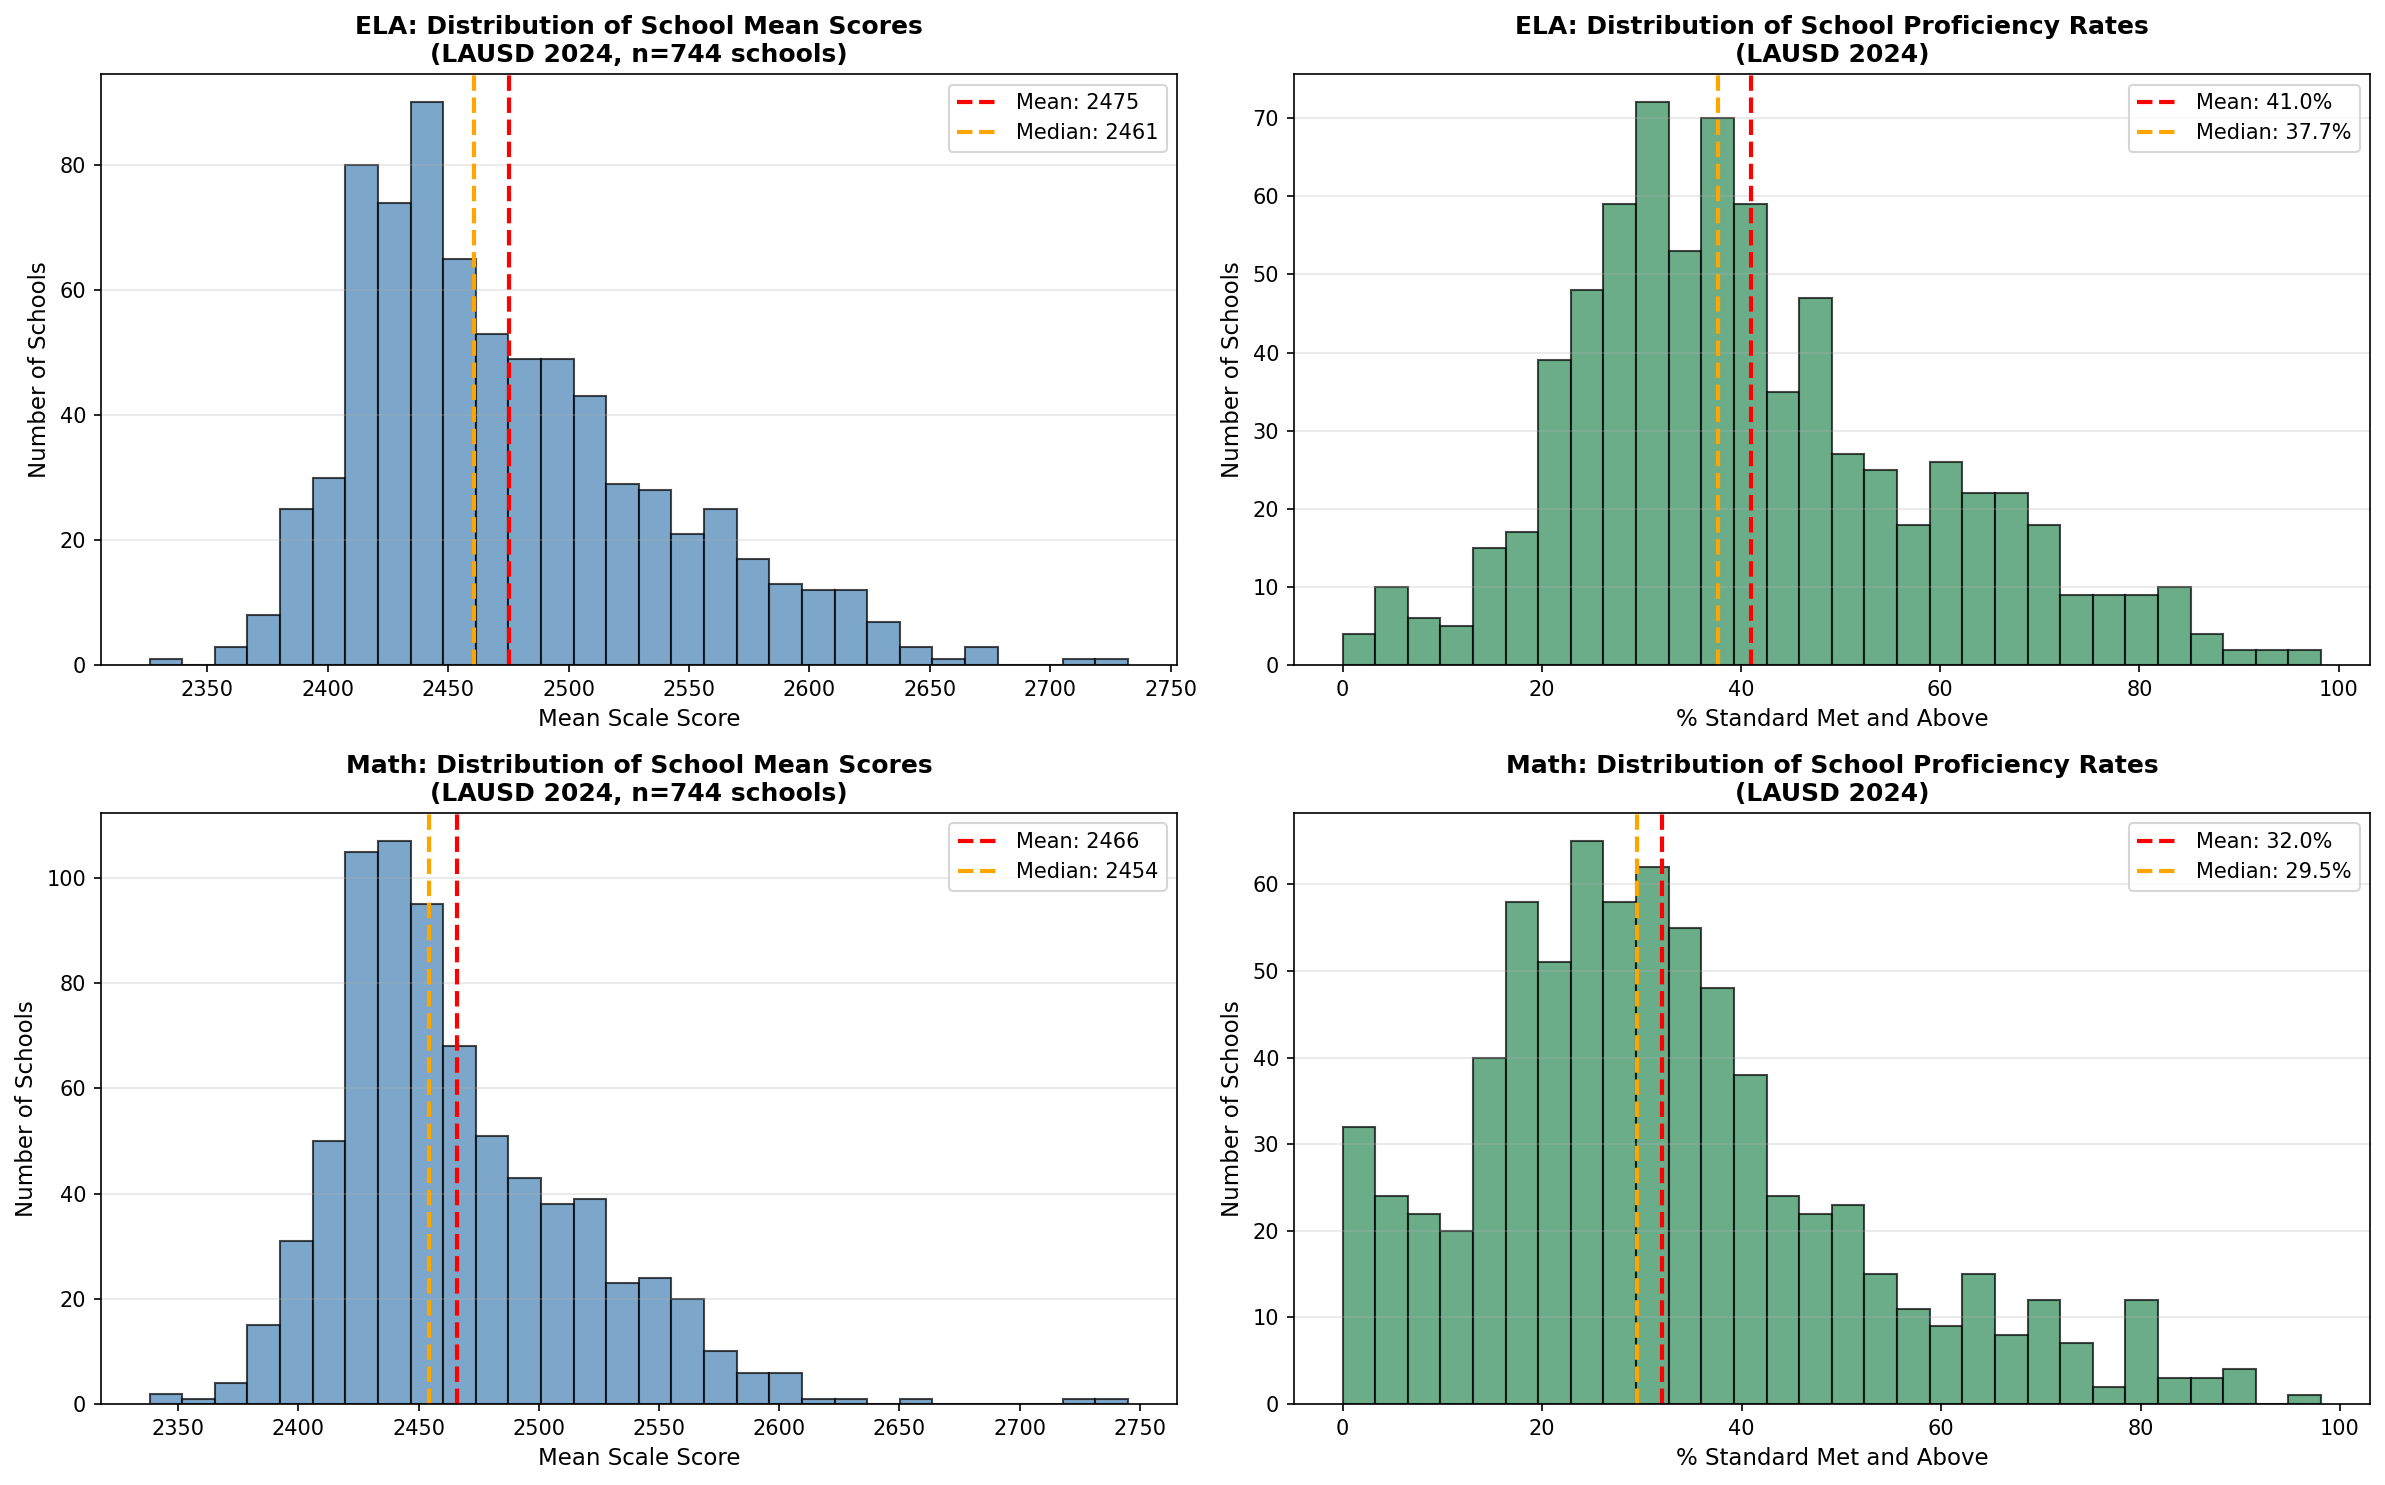


=== SCHOOL PERFORMANCE SUMMARY STATISTICS ===

ELA:
  Mean Scale Score - Mean: 2475, Std: 63
  Mean Scale Score - Range: 2326 to 2732
  % Met/Above - Mean: 41.0%, Std: 18.0%
  % Met/Above - Range: 0.0% to 98.2%

Math:
  Mean Scale Score - Mean: 2466, Std: 51
  Mean Scale Score - Range: 2338 to 2745
  % Met/Above - Mean: 32.0%, Std: 18.9%
  % Met/Above - Range: 0.0% to 98.1%



In [ ]:
# School Performance Distribution - Overview of all LAUSD schools
# Filter for individual schools (not district-wide aggregates)

mask_schools = (
    df["Test Year"].astype(str).eq("2024")
    & df["District Code"].astype(str).eq("64733")
    & df["School Code"].astype(str).ne("0000000")  # Exclude district-wide
    & df["Student Group ID"].astype(str).eq("1")  # All Students
)

df_schools = df.loc[mask_schools].copy()

# Convert metrics to numeric
df_schools["Mean Scale Score"] = pd.to_numeric(df_schools["Mean Scale Score"], errors="coerce")
df_schools["Percentage Standard Met and Above"] = pd.to_numeric(df_schools["Percentage Standard Met and Above"], errors="coerce")
df_schools["Total Students Tested with Scores"] = pd.to_numeric(df_schools["Total Students Tested with Scores"], errors="coerce")

# Drop School Name if it exists from df (to avoid duplicate columns after merge)
if "School Name" in df_schools.columns:
    df_schools = df_schools.drop(columns=["School Name"])

# Merge with school names from df3
df_schools = df_schools.merge(
    df3[["School Code", "School Name"]].drop_duplicates(),
    on="School Code",
    how="left"
)

# Aggregate by school (across all grades)
df_school_summary = (
    df_schools.groupby(["School Code", "School Name", "Test ID"], dropna=False)
    .agg({
        "Mean Scale Score": "mean",
        "Percentage Standard Met and Above": "mean",
        "Total Students Tested with Scores": "sum"
    })
    .reset_index()
)

# Remove schools with very small sample sizes (< 30 students tested)
df_school_summary = df_school_summary[df_school_summary["Total Students Tested with Scores"] >= 30]

print(f"Total schools analyzed: {df_school_summary['School Code'].nunique()}")
print(f"Total students in analysis: {df_school_summary['Total Students Tested with Scores'].sum():,.0f}")

# Create distribution histograms for ELA and Math
fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=150)

for idx, test_id in enumerate(['1', '2']):
    test_name = 'ELA' if test_id == '1' else 'Math'
    data = df_school_summary[df_school_summary["Test ID"].astype(str) == test_id]
    
    if data.empty:
        continue
    
    # Histogram of Mean Scale Scores
    ax = axes[idx, 0]
    ax.hist(data["Mean Scale Score"].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    ax.axvline(data["Mean Scale Score"].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data["Mean Scale Score"].mean():.0f}')
    ax.axvline(data["Mean Scale Score"].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data["Mean Scale Score"].median():.0f}')
    ax.set_xlabel("Mean Scale Score", fontsize=11)
    ax.set_ylabel("Number of Schools", fontsize=11)
    ax.set_title(f"{test_name}: Distribution of School Mean Scores\n(LAUSD 2024, n={len(data)} schools)", fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Histogram of % Met/Above
    ax = axes[idx, 1]
    ax.hist(data["Percentage Standard Met and Above"].dropna(), bins=30, color='seagreen', alpha=0.7, edgecolor='black')
    ax.axvline(data["Percentage Standard Met and Above"].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data["Percentage Standard Met and Above"].mean():.1f}%')
    ax.axvline(data["Percentage Standard Met and Above"].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data["Percentage Standard Met and Above"].median():.1f}%')
    ax.set_xlabel("% Standard Met and Above", fontsize=11)
    ax.set_ylabel("Number of Schools", fontsize=11)
    ax.set_title(f"{test_name}: Distribution of School Proficiency Rates\n(LAUSD 2024)", fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n SCHOOL PERFORMANCE SUMMARY STATISTICS\n")
for test_id, test_name in [('1', 'ELA'), ('2', 'Math')]:
    data = df_school_summary[df_school_summary["Test ID"].astype(str) == test_id]
    print(f"{test_name}:")
    print(f"  Mean Scale Score - Mean: {data['Mean Scale Score'].mean():.0f}, Std: {data['Mean Scale Score'].std():.0f}")
    print(f"  Mean Scale Score - Range: {data['Mean Scale Score'].min():.0f} to {data['Mean Scale Score'].max():.0f}")
    print(f"  % Met/Above - Mean: {data['Percentage Standard Met and Above'].mean():.1f}%, Std: {data['Percentage Standard Met and Above'].std():.1f}%")
    print(f"  % Met/Above - Range: {data['Percentage Standard Met and Above'].min():.1f}% to {data['Percentage Standard Met and Above'].max():.1f}%")
    print()

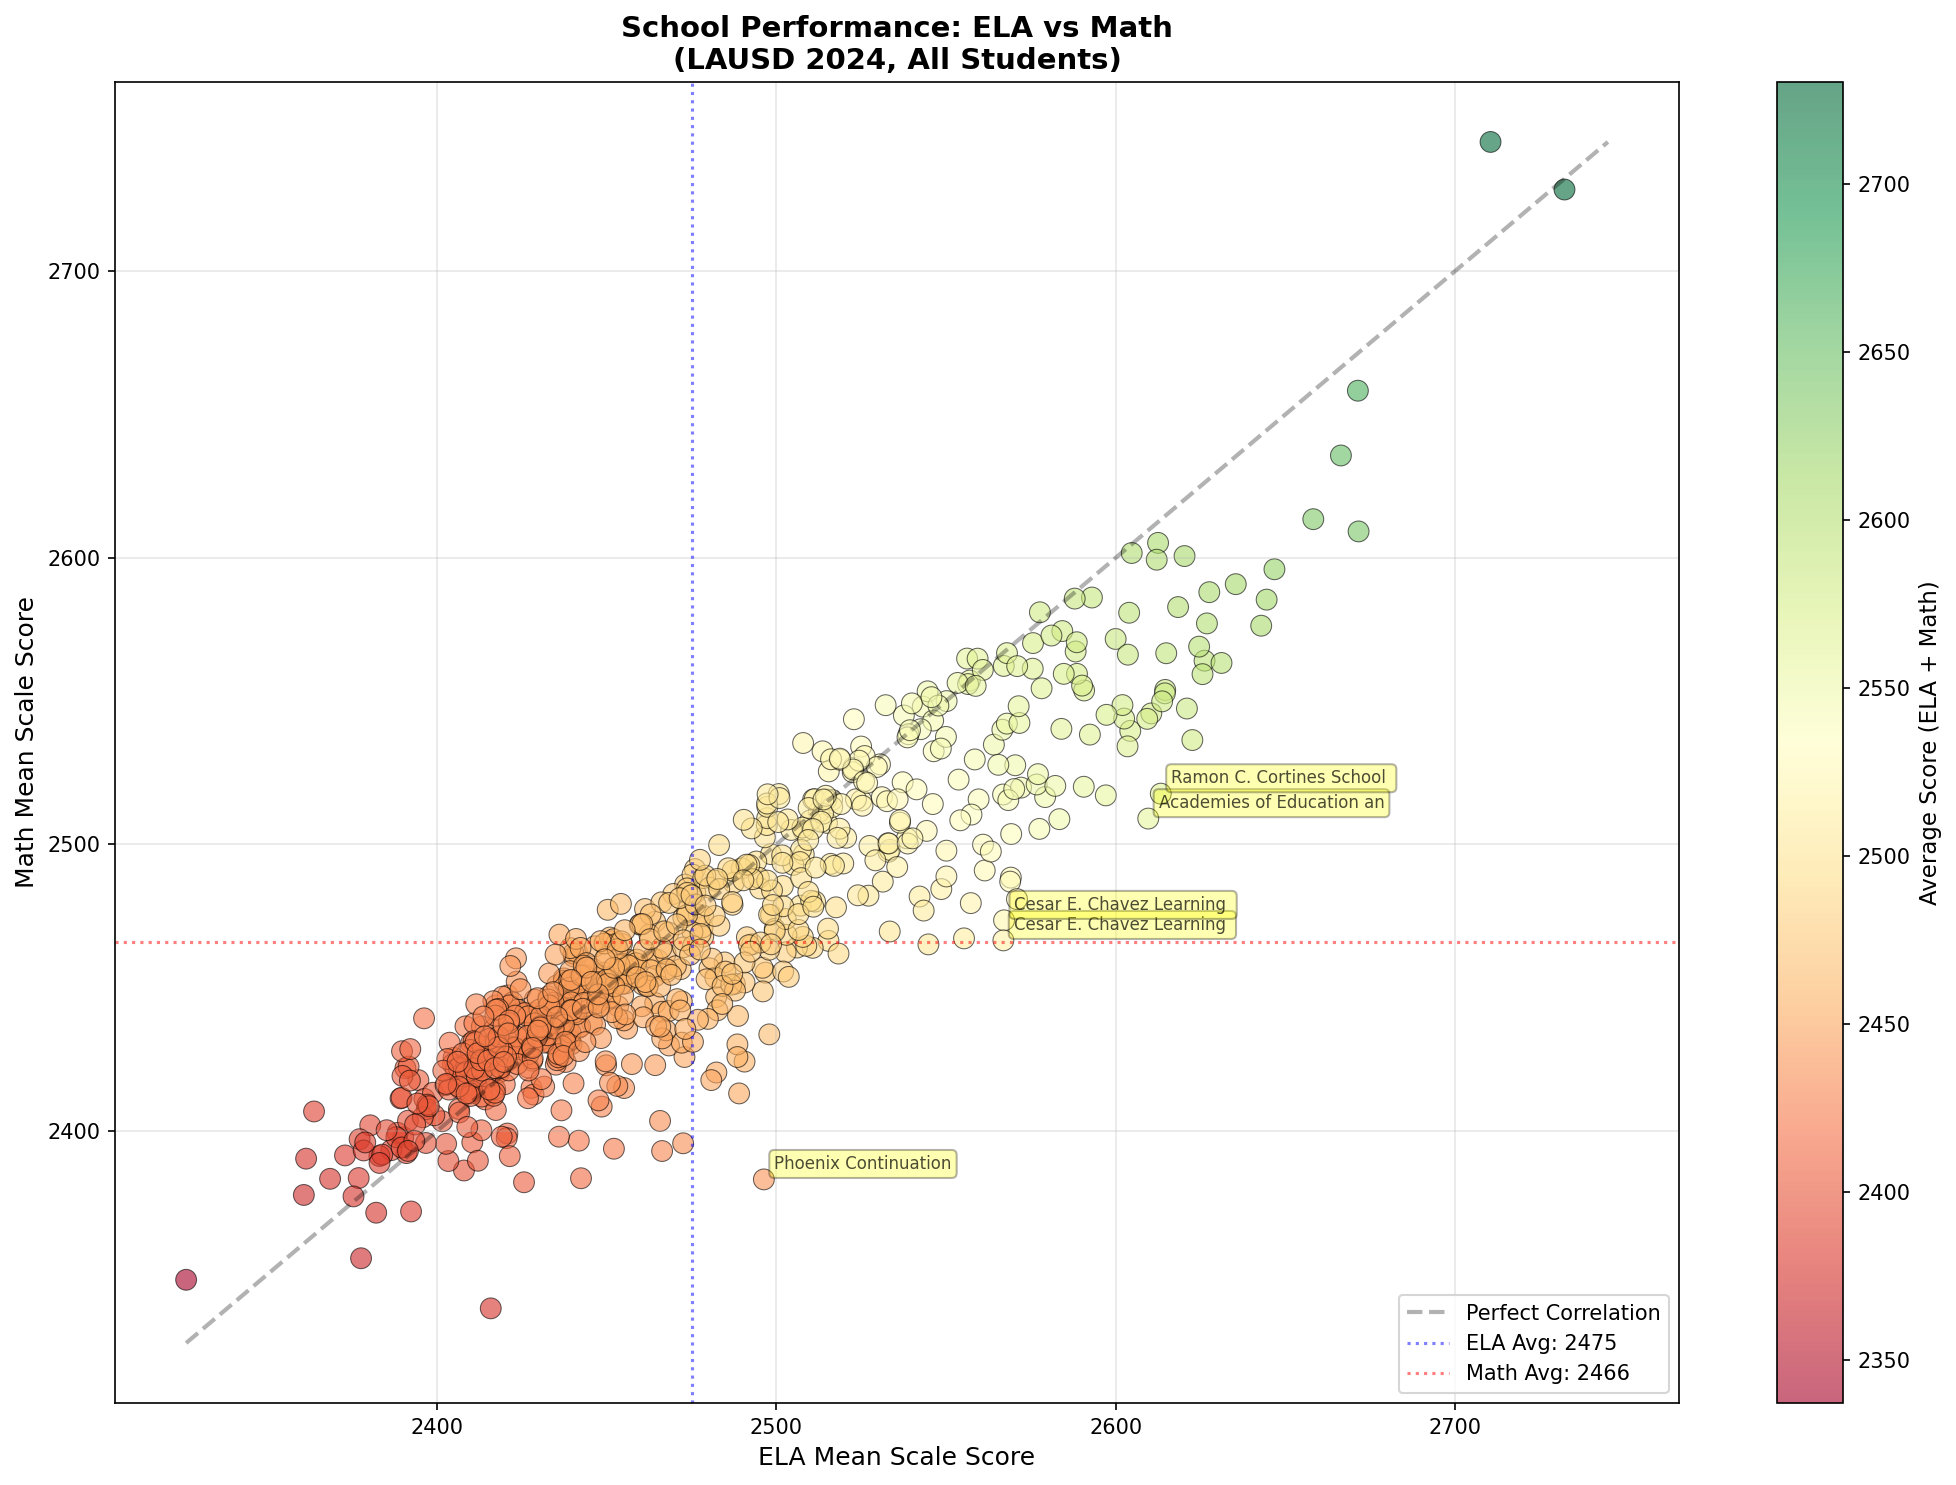


SUBJECT-SPECIFIC PERFORMANCE PATTERNS

Top 5 Schools Significantly Stronger in ELA than Math:
  Phoenix Continuation: ELA=2496, Math=2383, Diff=113
  Academies of Education and Empowerment at Car: ELA=2610, Math=2509, Diff=101
  Cesar E. Chavez Learning Academies-Technology: ELA=2567, Math=2466, Diff=100
  Ramon C. Cortines School of Visual and Perfor: ELA=2613, Math=2518, Diff=96
  Cesar E. Chavez Learning Academies-Social Jus: ELA=2567, Math=2474, Diff=94

Top 5 Schools Strong in BOTH ELA and Math:
  Dr. Richard A. Vladovic Harbor Teacher Prepar: ELA=2732, Math=2728, Avg=2730
  Science Academy STEM Magnet: ELA=2710, Math=2745, Avg=2728
  Downtown Business High: ELA=2671, Math=2658, Avg=2665
  Middle College High: ELA=2666, Math=2636, Avg=2651
  Francisco Bravo Medical Magnet High: ELA=2672, Math=2609, Avg=2640

Bottom 5 Schools Struggling in BOTH ELA and Math (need intervention):
  Marlton: ELA=2326, Math=2348, Avg=2337
  Los Angeles Unified District Level Program: ELA=2378, Math=23

In [ ]:
# School Performance Scatter: ELA vs Math
# Identify schools strong in one subject but not the other

# Pivot data to have both ELA and Math scores for each school
df_school_pivot = df_school_summary.pivot_table(
    index=["School Code", "School Name"],
    columns="Test ID",
    values=["Mean Scale Score", "Percentage Standard Met and Above", "Total Students Tested with Scores"],
    aggfunc="mean"
).reset_index()

# Flatten column names
df_school_pivot.columns = ['_'.join(map(str, col)).strip('_') if col[1] else col[0] for col in df_school_pivot.columns.values]

# Rename for clarity
df_school_pivot = df_school_pivot.rename(columns={
    'Mean Scale Score_1': 'ELA_Score',
    'Mean Scale Score_2': 'Math_Score',
    'Percentage Standard Met and Above_1': 'ELA_PctMet',
    'Percentage Standard Met and Above_2': 'Math_PctMet',
    'Total Students Tested with Scores_1': 'ELA_N',
    'Total Students Tested with Scores_2': 'Math_N'
})

# Remove schools without both ELA and Math data
df_school_pivot = df_school_pivot.dropna(subset=['ELA_Score', 'Math_Score'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 10), dpi=150)

# Color by the average of ELA and Math scores
df_school_pivot['Avg_Score'] = (df_school_pivot['ELA_Score'] + df_school_pivot['Math_Score']) / 2

scatter = ax.scatter(
    df_school_pivot['ELA_Score'],
    df_school_pivot['Math_Score'],
    c=df_school_pivot['Avg_Score'],
    s=100,
    alpha=0.6,
    cmap='RdYlGn',
    edgecolors='black',
    linewidth=0.5
)

# Add diagonal line (perfect correlation)
min_score = min(df_school_pivot['ELA_Score'].min(), df_school_pivot['Math_Score'].min())
max_score = max(df_school_pivot['ELA_Score'].max(), df_school_pivot['Math_Score'].max())
ax.plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.3, linewidth=2, label='Perfect Correlation')

# Add reference lines for district averages
ela_district_avg = df_school_pivot['ELA_Score'].mean()
math_district_avg = df_school_pivot['Math_Score'].mean()
ax.axvline(ela_district_avg, color='blue', linestyle=':', alpha=0.5, linewidth=1.5, label=f'ELA Avg: {ela_district_avg:.0f}')
ax.axhline(math_district_avg, color='red', linestyle=':', alpha=0.5, linewidth=1.5, label=f'Math Avg: {math_district_avg:.0f}')

# Label outliers (schools that differ significantly between ELA and Math)
df_school_pivot['Difference'] = abs(df_school_pivot['ELA_Score'] - df_school_pivot['Math_Score'])
outliers = df_school_pivot.nlargest(5, 'Difference')

for _, row in outliers.iterrows():
    ax.annotate(
        row['School Name'][:25],  # Truncate long names
        (row['ELA_Score'], row['Math_Score']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.7,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3)
    )

ax.set_xlabel("ELA Mean Scale Score", fontsize=12)
ax.set_ylabel("Math Mean Scale Score", fontsize=12)
ax.set_title("School Performance: ELA vs Math\n(LAUSD 2024, All Students)", fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Score (ELA + Math)', fontsize=11)

plt.tight_layout()
plt.show()

# Identify schools with notable subject-specific strengths/weaknesses
print("\nSUBJECT-SPECIFIC PERFORMANCE PATTERNS\n")

# Schools much stronger in ELA than Math
ela_stronger = df_school_pivot[df_school_pivot['ELA_Score'] > df_school_pivot['Math_Score'] + 50].nlargest(5, 'Difference')
if not ela_stronger.empty:
    print("Top 5 Schools Significantly Stronger in ELA than Math:")
    for _, row in ela_stronger.iterrows():
        print(f"  {row['School Name'][:45]}: ELA={row['ELA_Score']:.0f}, Math={row['Math_Score']:.0f}, Diff={row['Difference']:.0f}")
    print()

# Schools much stronger in Math than ELA
math_stronger = df_school_pivot[df_school_pivot['Math_Score'] > df_school_pivot['ELA_Score'] + 50].nlargest(5, 'Difference')
if not math_stronger.empty:
    print("Top 5 Schools Significantly Stronger in Math than ELA:")
    for _, row in math_stronger.iterrows():
        print(f"  {row['School Name'][:45]}: ELA={row['ELA_Score']:.0f}, Math={row['Math_Score']:.0f}, Diff={row['Difference']:.0f}")
    print()

# Schools strong in both
both_strong = df_school_pivot[(df_school_pivot['ELA_Score'] > ela_district_avg) & 
                               (df_school_pivot['Math_Score'] > math_district_avg)].nlargest(5, 'Avg_Score')
print("Top 5 Schools Strong in BOTH ELA and Math:")
for _, row in both_strong.iterrows():
    print(f"  {row['School Name'][:45]}: ELA={row['ELA_Score']:.0f}, Math={row['Math_Score']:.0f}, Avg={row['Avg_Score']:.0f}")
print()

# Schools struggling in both
both_struggling = df_school_pivot[(df_school_pivot['ELA_Score'] < ela_district_avg) & 
                                   (df_school_pivot['Math_Score'] < math_district_avg)].nsmallest(5, 'Avg_Score')
print("Bottom 5 Schools Struggling in BOTH ELA and Math (need intervention):")
for _, row in both_struggling.iterrows():
    print(f"  {row['School Name'][:45]}: ELA={row['ELA_Score']:.0f}, Math={row['Math_Score']:.0f}, Avg={row['Avg_Score']:.0f}")

C:\Users\twinx\AppData\Local\Temp\ipykernel_7348\2628784072.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=size_order, patch_artist=True, showmeans=True,
C:\Users\twinx\AppData\Local\Temp\ipykernel_7348\2628784072.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=size_order, patch_artist=True, showmeans=True,


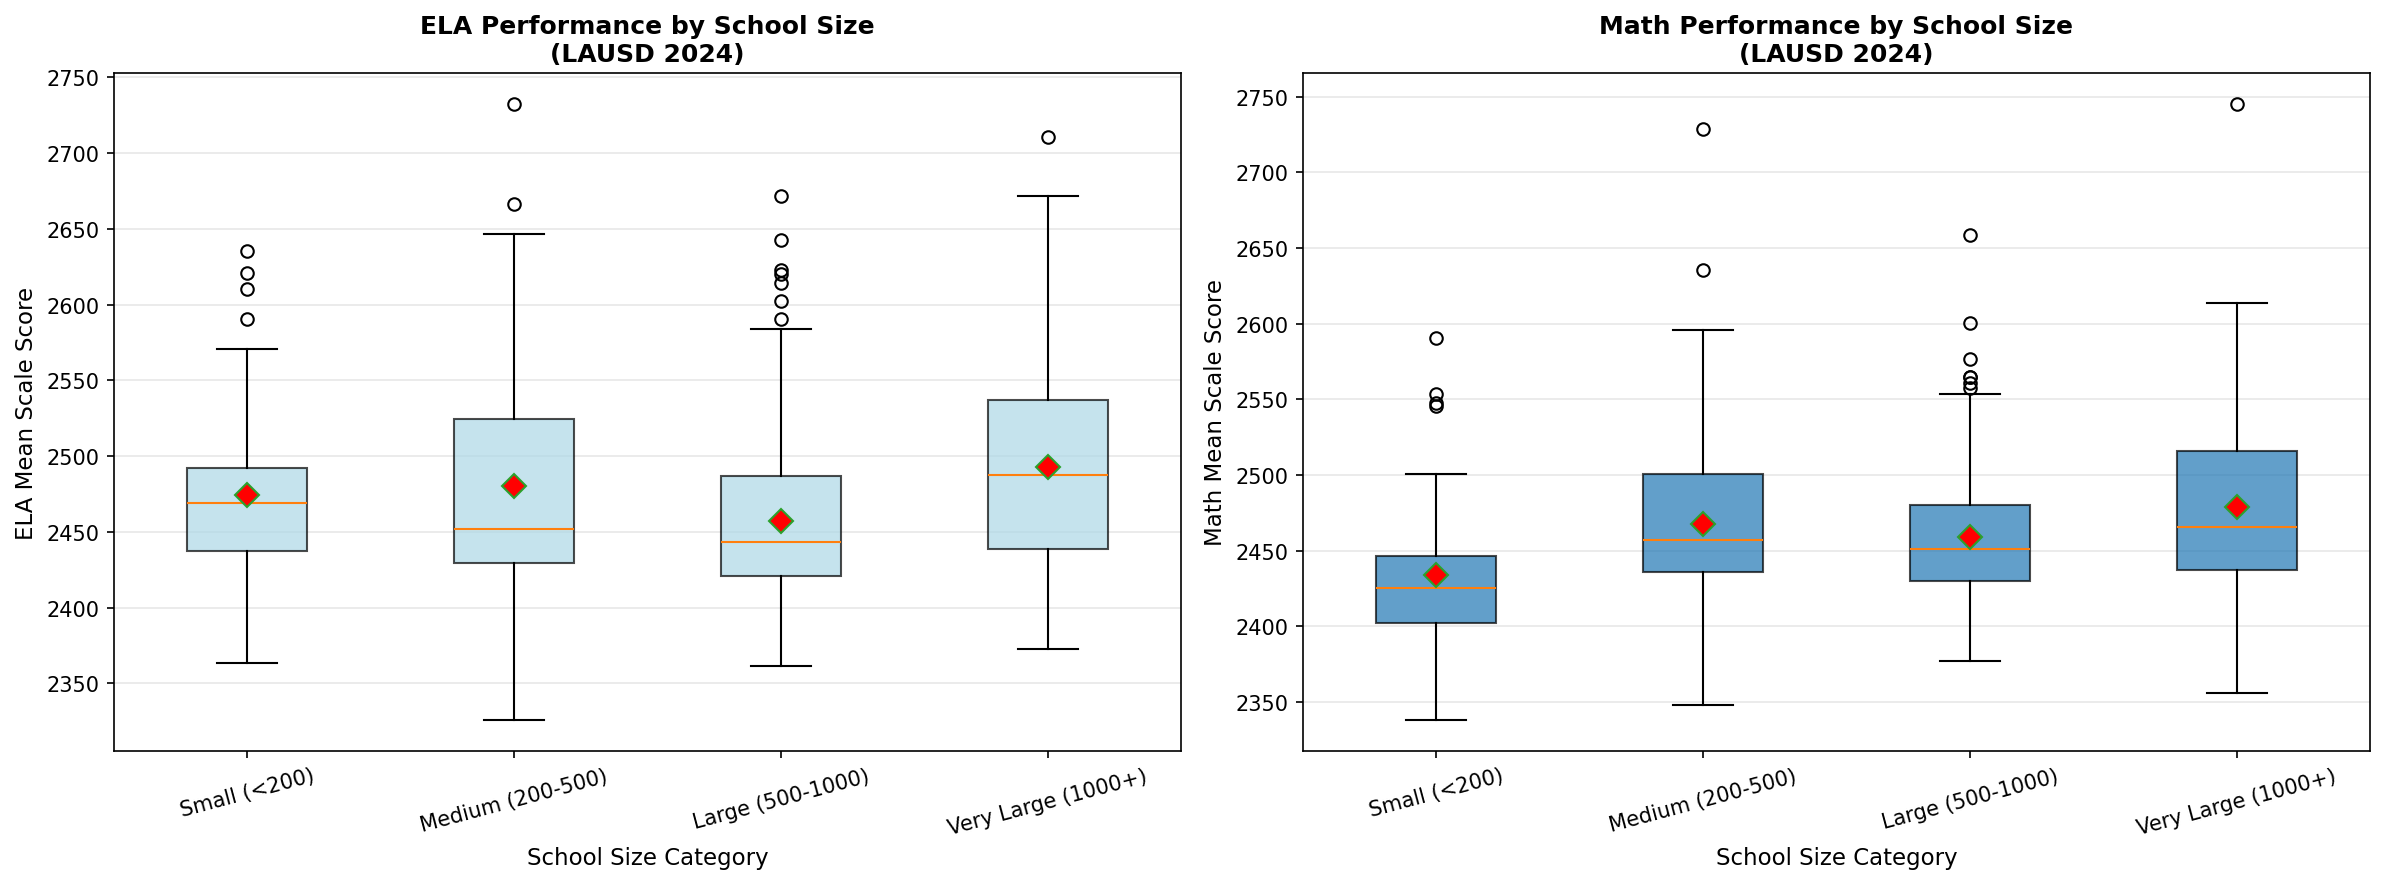


PERFORMANCE BY SCHOOL SIZE

Small (<200) Schools (n=48):
  ELA - Mean: 2474, Median: 2469
  Math - Mean: 2434, Median: 2425

Medium (200-500) Schools (n=109):
  ELA - Mean: 2480, Median: 2452
  Math - Mean: 2467, Median: 2457

Large (500-1000) Schools (n=306):
  ELA - Mean: 2457, Median: 2444
  Math - Mean: 2459, Median: 2451

Very Large (1000+) Schools (n=280):
  ELA - Mean: 2493, Median: 2487
  Math - Mean: 2479, Median: 2465



In [ ]:
# School Performance by Student Enrollment Size
# Examine if school size correlates with performance

# Calculate total enrollment per school
df_school_size = df_schools.groupby(["School Code", "School Name"])["Total Students Tested with Scores"].sum().reset_index()
df_school_size.columns = ["School Code", "School Name", "Total_Enrollment"]

# Merge with performance data
df_size_perf = df_school_pivot.merge(df_school_size, on=["School Code", "School Name"], how="left")

# Categorize schools by size
df_size_perf['Size_Category'] = pd.cut(
    df_size_perf['Total_Enrollment'],
    bins=[0, 200, 500, 1000, 10000],
    labels=['Small (<200)', 'Medium (200-500)', 'Large (500-1000)', 'Very Large (1000+)']
)

# Create box plots comparing performance by size
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=150)

# ELA by size
ax = axes[0]
size_order = ['Small (<200)', 'Medium (200-500)', 'Large (500-1000)', 'Very Large (1000+)']
data_to_plot = [df_size_perf[df_size_perf['Size_Category'] == cat]['ELA_Score'].dropna() for cat in size_order]

bp = ax.boxplot(data_to_plot, labels=size_order, patch_artist=True, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_ylabel("ELA Mean Scale Score", fontsize=11)
ax.set_xlabel("School Size Category", fontsize=11)
ax.set_title("ELA Performance by School Size\n(LAUSD 2024)", fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=15)

# Math by size
ax = axes[1]
data_to_plot = [df_size_perf[df_size_perf['Size_Category'] == cat]['Math_Score'].dropna() for cat in size_order]

bp = ax.boxplot(data_to_plot, labels=size_order, patch_artist=True, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch in bp['boxes']:
    patch.set_facecolor='lightgreen'
    patch.set_alpha(0.7)

ax.set_ylabel("Math Mean Scale Score", fontsize=11)
ax.set_xlabel("School Size Category", fontsize=11)
ax.set_title("Math Performance by School Size\n(LAUSD 2024)", fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Statistical summary by size
print("\nPERFORMANCE BY SCHOOL SIZE\n")
for cat in size_order:
    cat_data = df_size_perf[df_size_perf['Size_Category'] == cat]
    if len(cat_data) > 0:
        print(f"{cat} Schools (n={len(cat_data)}):")
        print(f"ELA - Mean: {cat_data['ELA_Score'].mean():.0f}, Median: {cat_data['ELA_Score'].median():.0f}")
        print(f"Math - Mean: {cat_data['Math_Score'].mean():.0f}, Median: {cat_data['Math_Score'].median():.0f}")
        print()